# Data Quality Report for Dublin Weather

### The CSV files referenced here are available to download [here.](https://drive.google.com/drive/folders/1cVK3-9skev3Xg-FhSA6Yl8HMqaucgfTz?usp=sharing)

### Importing Packages

In [60]:
#Import package pandas for data analysis
import pandas as pd

#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

### Understanding Initial Data Set

In [61]:
# importing csv file from the dynamic scraper

df = pd.read_csv('weather.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,11119,11120,11121,11122,11123,11124,11125,11126,11127,11128
id,1,2,3,4,5,6,7,8,9,10,...,11120,11121,11122,11123,11124,11125,11126,11127,11128,11129
coord_lon,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25,...,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25,-6.25
coord_lat,53.36,53.36,53.36,53.36,53.36,53.36,53.36,53.36,53.36,53.36,...,53.36,53.36,53.36,53.36,53.36,53.36,53.36,53.36,53.36,53.36
weather_id,803,803,803,803,803,803,803,803,803,803,...,802,802,801,801,801,801,801,801,802,802
weather_main,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds,...,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds,Clouds
weather_description,broken clouds,broken clouds,broken clouds,broken clouds,broken clouds,broken clouds,broken clouds,broken clouds,broken clouds,broken clouds,...,scattered clouds,scattered clouds,few clouds,few clouds,few clouds,few clouds,few clouds,few clouds,scattered clouds,scattered clouds
weather_icon,04n,04n,04n,04n,04n,04n,04n,04n,04n,04n,...,03d,03d,02d,02d,02d,02d,02d,02d,03d,03d
base,stations,stations,stations,stations,stations,stations,stations,stations,stations,stations,...,stations,stations,stations,stations,stations,stations,stations,stations,stations,stations
main_temp,284.58,284.57,284.57,284.57,284.15,284.15,284.15,284.15,284.15,284.15,...,274.78,274.78,274.89,274.89,274.89,274.89,274.89,274.97,275.12,275.12
main_pressure,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011,...,1007,1007,1007,1007,1007,1007,1007,1007,1006,1006


In [62]:
df.shape

(11129, 28)

In [63]:
# initial datatypes. 

df.dtypes

id                       int64
coord_lon              float64
coord_lat              float64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
base                    object
main_temp              float64
main_pressure            int64
main_humidity            int64
main_temp_min          float64
main_temp_max          float64
visibility               int64
wind_speed             float64
wind_deg                 int64
clouds_all               int64
dt                      object
sys_type                 int64
sys_id                   int64
sys_message            float64
sys_country             object
sys_sunrise             object
sys_sunset              object
city_id                  int64
city_name               object
cod                      int64
created_at              object
dtype: object

### Evaluating/Changing Data Types

|Feature|Datatype From|Datatype To|
|-------------------------|----------------------|------------------------|
|weather_main|object|categorical|
|weather_description|object|categorical|
|base|object|Keep|
|city_name|object|Keep|
|created_at|object|datetime64[ns]|
|sys_sunset|object|datetime64[ns]|
|sys_sunrise|object|datetime64[ns]|
|dt|object|datetime64[ns]|

In [64]:
# Select columns containing categorical data
categorical_columns = df[['weather_main', 'weather_description', 'weather_icon', 'base', 'sys_country']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [65]:
# changing features create_at, dt, sys_sunset, and sys_sunrise to datatype datetime64

datetime_columns = df[['created_at', 'dt', 'sys_sunset', 'sys_sunrise']].columns

# Convert data type to datetime for these columns

for column in datetime_columns:
    df[column] = df[column].astype('datetime64[ns]')

# Let view our updated datatypes!

df.dtypes

id                              int64
coord_lon                     float64
coord_lat                     float64
weather_id                      int64
weather_main                 category
weather_description          category
weather_icon                 category
base                         category
main_temp                     float64
main_pressure                   int64
main_humidity                   int64
main_temp_min                 float64
main_temp_max                 float64
visibility                      int64
wind_speed                    float64
wind_deg                        int64
clouds_all                      int64
dt                     datetime64[ns]
sys_type                        int64
sys_id                          int64
sys_message                   float64
sys_country                  category
sys_sunrise            datetime64[ns]
sys_sunset             datetime64[ns]
city_id                         int64
city_name                      object
cod         

### Adding additional DateTime Information (INT64 type)

In [66]:
# Adding columns to dataset displaying the numerical value for days of the week 
# The features added are 'create_at_weekday', 'dt_weekday', 'sys_sunset', and 'sys_sunrise'

df['create_at_weekday'] = df.created_at.dt.weekday
df['dt_weekday'] = df.dt.dt.weekday
df['sunset_at_weekday'] = df.sys_sunset.dt.weekday
df['sunrise_at_weekday'] = df.sys_sunrise.dt.weekday
df.head()

,id,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,base,main_temp,main_pressure,...,sys_sunrise,sys_sunset,city_id,city_name,cod,created_at,create_at_weekday,dt_weekday,sunset_at_weekday,sunrise_at_weekday
0,1,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.58,1011,...,2019-02-20 07:31:43,2019-02-20 17:46:28,7778677,Dublin City,200,2019-02-20 19:10:01,2,2,2,2
1,2,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.57,1011,...,2019-02-20 07:31:42,2019-02-20 17:46:29,7778677,Dublin City,200,2019-02-20 19:15:01,2,2,2,2
2,3,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.57,1011,...,2019-02-20 07:31:42,2019-02-20 17:46:29,7778677,Dublin City,200,2019-02-20 19:20:02,2,2,2,2
3,4,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.57,1011,...,2019-02-20 07:31:41,2019-02-20 17:46:30,7778677,Dublin City,200,2019-02-20 19:25:01,2,2,2,2
4,5,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.15,1011,...,2019-02-20 07:31:41,2019-02-20 17:46:30,7778677,Dublin City,200,2019-02-20 19:30:02,2,2,2,2


### Descriptive Statistics For DateTime Features

In [67]:
# Descriptive statistics for all the DateTime features

df.select_dtypes(['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
dt,11129,5881,2019-02-23 03:00:00,9,2019-02-20 18:30:00,2019-04-02 06:48:54
sys_sunrise,11129,2786,2019-03-18 06:33:18,289,2019-02-20 07:31:17,2019-04-02 05:56:49
sys_sunset,11129,2394,2019-03-18 18:33:05,289,2019-02-20 17:46:28,2019-04-02 19:00:12
created_at,11129,11129,2019-03-15 12:35:02,1,2019-02-20 19:10:01,2019-04-02 06:55:02


### Descriptive Statistics for Categorical Features

In [68]:
# Descriptive statistics for all the categorical features

df.select_dtypes(['category']).describe().T

,count,unique,top,freq
weather_main,11129,7,Clouds,6179
weather_description,11129,18,broken clouds,3691
weather_icon,11129,16,04d,1961
base,11129,1,stations,11129
sys_country,11129,1,IE,11129


### Descriptive Statistics for Categorical Features

In [69]:
# Keep only the numeric features.

numeric_columns = df.select_dtypes(['int64']).columns
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,11129.0,5.565000e+03,3212.809907,1.0,2783.0,5565.0,8347.0,11129.0
weather_id,11129.0,6.847025e+02,153.968243,300.0,501.0,801.0,803.0,804.0
main_pressure,11129.0,1.015232e+03,15.470999,978.0,1004.0,1020.0,1028.0,1036.0
main_humidity,11129.0,8.030308e+01,12.064039,36.0,71.0,81.0,87.0,100.0
visibility,11129.0,9.496824e+03,1611.642418,200.0,10000.0,10000.0,10000.0,10000.0
wind_deg,11129.0,2.218223e+02,63.146188,10.0,190.0,240.0,260.0,360.0
clouds_all,11129.0,5.934451e+01,23.992351,0.0,40.0,75.0,75.0,90.0
sys_type,11129.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
sys_id,11129.0,1.565018e+03,0.230353,1565.0,1565.0,1565.0,1565.0,1568.0
city_id,11129.0,7.778677e+06,0.000000,7778677.0,7778677.0,7778677.0,7778677.0,7778677.0


### Checking for Duplicates

In [70]:
# Checking where there are any duplicate rows within the data set by creating a new row
# If the boolean value is True within the column is_duplicate it means that the row is dublicate

df["is_duplicate"]= df.duplicated()
df.loc["is_duplicate"]=True
df.head()

,id,coord_lon,coord_lat,weather_id,weather_main,weather_description,weather_icon,base,main_temp,main_pressure,...,sys_sunset,city_id,city_name,cod,created_at,create_at_weekday,dt_weekday,sunset_at_weekday,sunrise_at_weekday,is_duplicate
0,1,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.58,1011,...,2019-02-20 17:46:28,7778677,Dublin City,200,2019-02-20 19:10:01,2,2,2,2,False
1,2,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.57,1011,...,2019-02-20 17:46:29,7778677,Dublin City,200,2019-02-20 19:15:01,2,2,2,2,False
2,3,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.57,1011,...,2019-02-20 17:46:29,7778677,Dublin City,200,2019-02-20 19:20:02,2,2,2,2,False
3,4,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.57,1011,...,2019-02-20 17:46:30,7778677,Dublin City,200,2019-02-20 19:25:01,2,2,2,2,False
4,5,-6.25,53.36,803,Clouds,broken clouds,04n,stations,284.15,1011,...,2019-02-20 17:46:30,7778677,Dublin City,200,2019-02-20 19:30:02,2,2,2,2,False


In [71]:
# Counting the number of duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])

# Counting the number of duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 0
Duplicate columns: 0


### Box Plots for Continuous Features

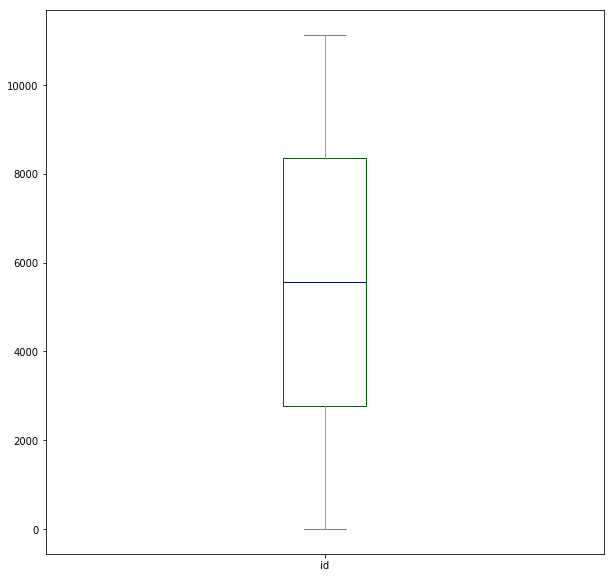

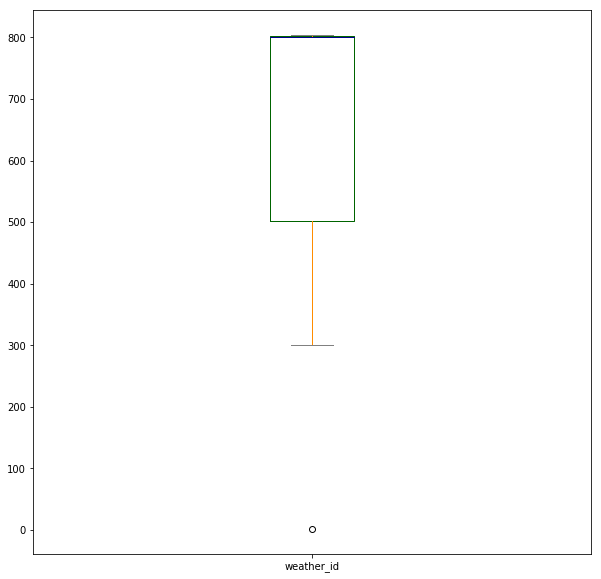

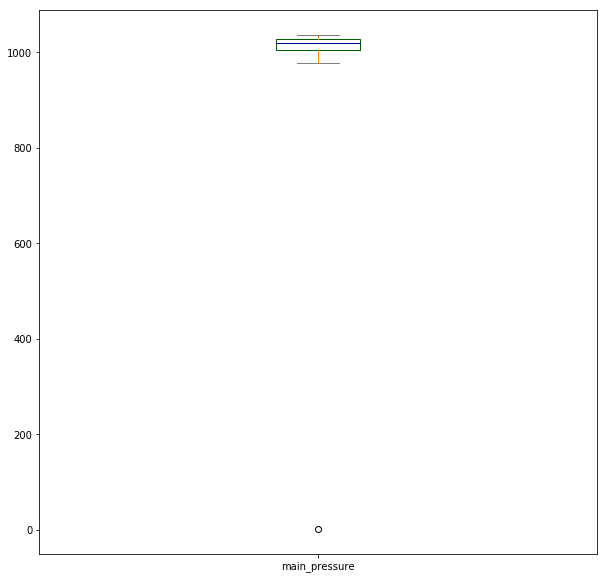

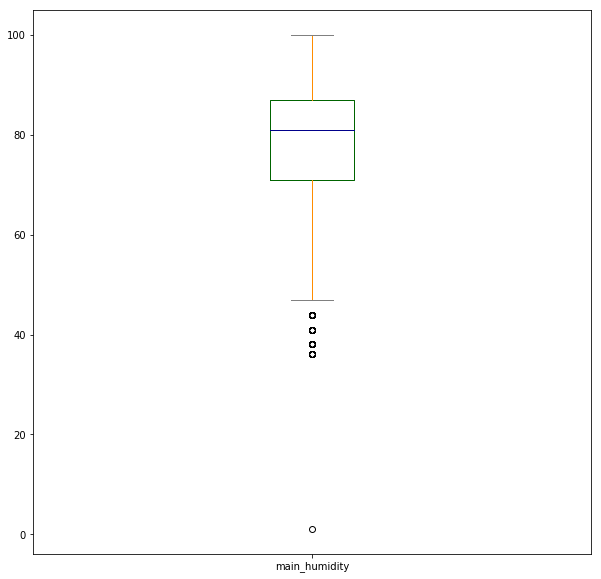

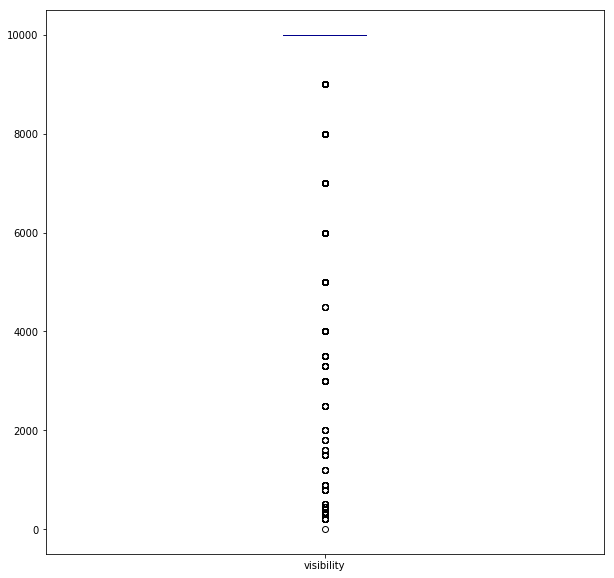

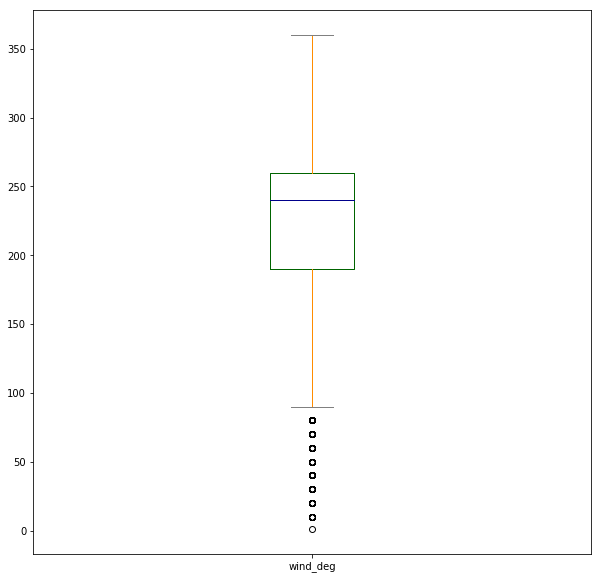

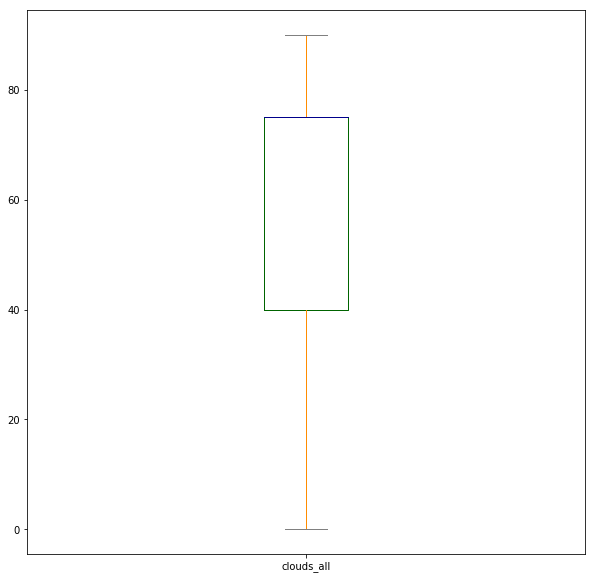

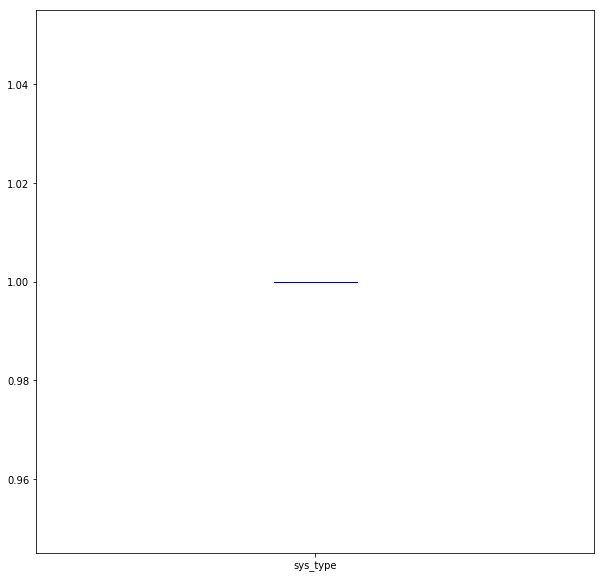

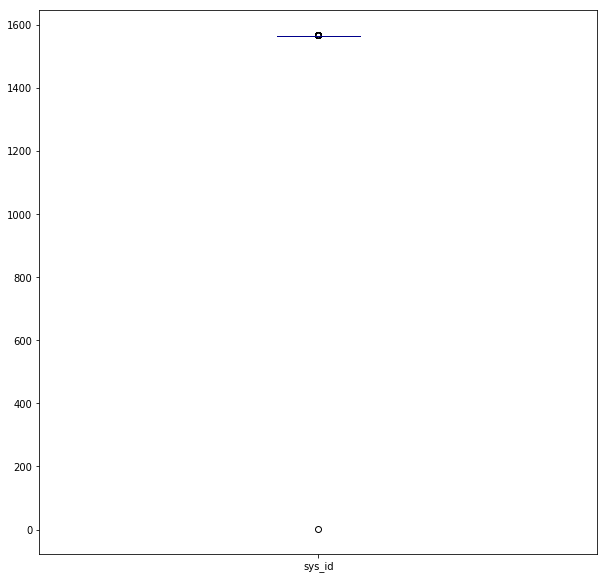

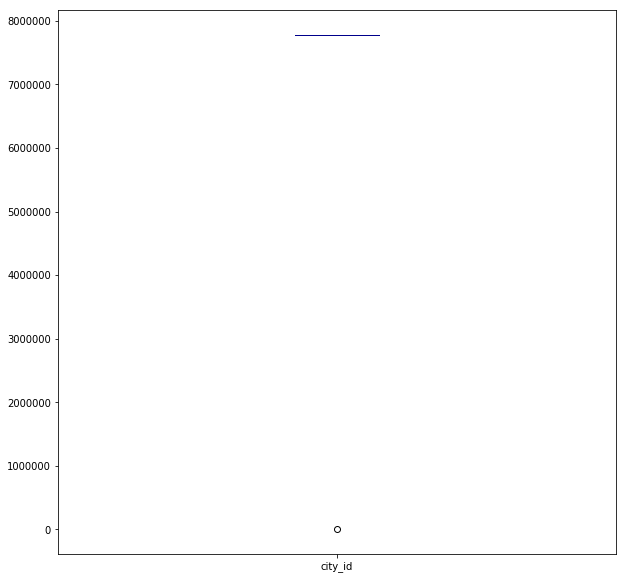

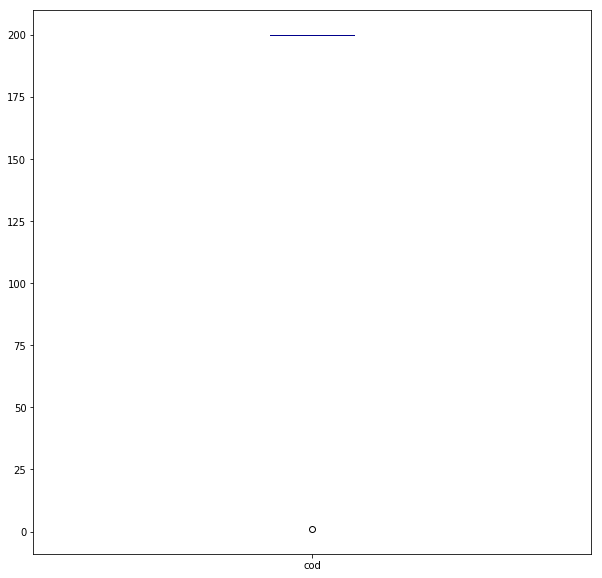

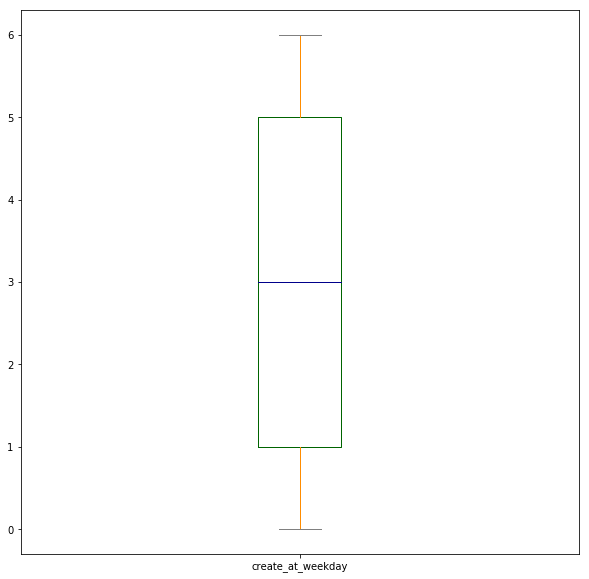

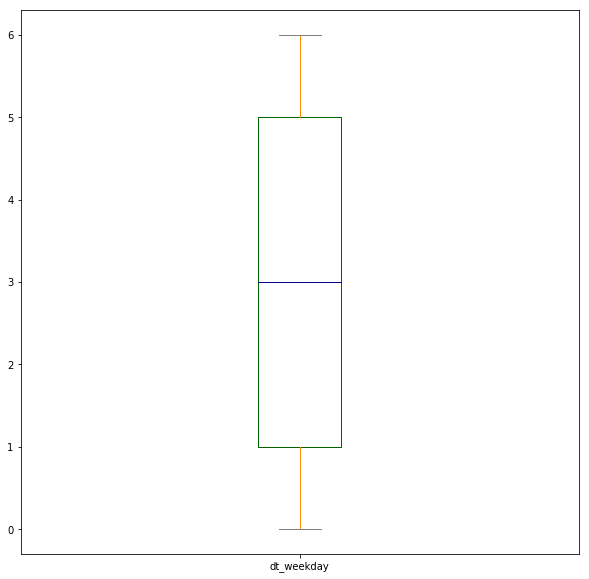

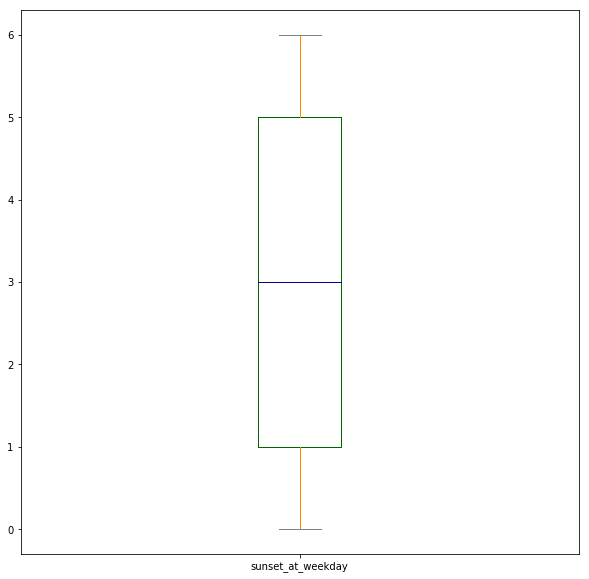

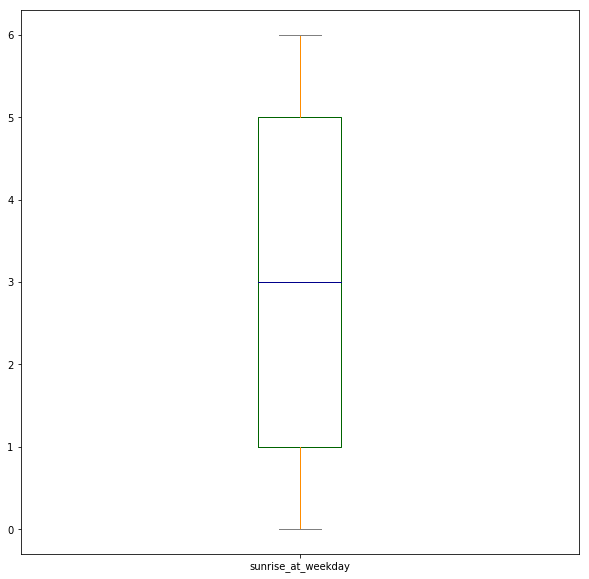

In [72]:
# Box plots for all continuous features within the data set

numeric_columns = df.select_dtypes(['int64']).columns
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

for col in numeric_columns:
    f = df[col].plot(color= color, kind='box', figsize=(10, 10))
    plt.show()

### Histograms for Continuous Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29207630>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

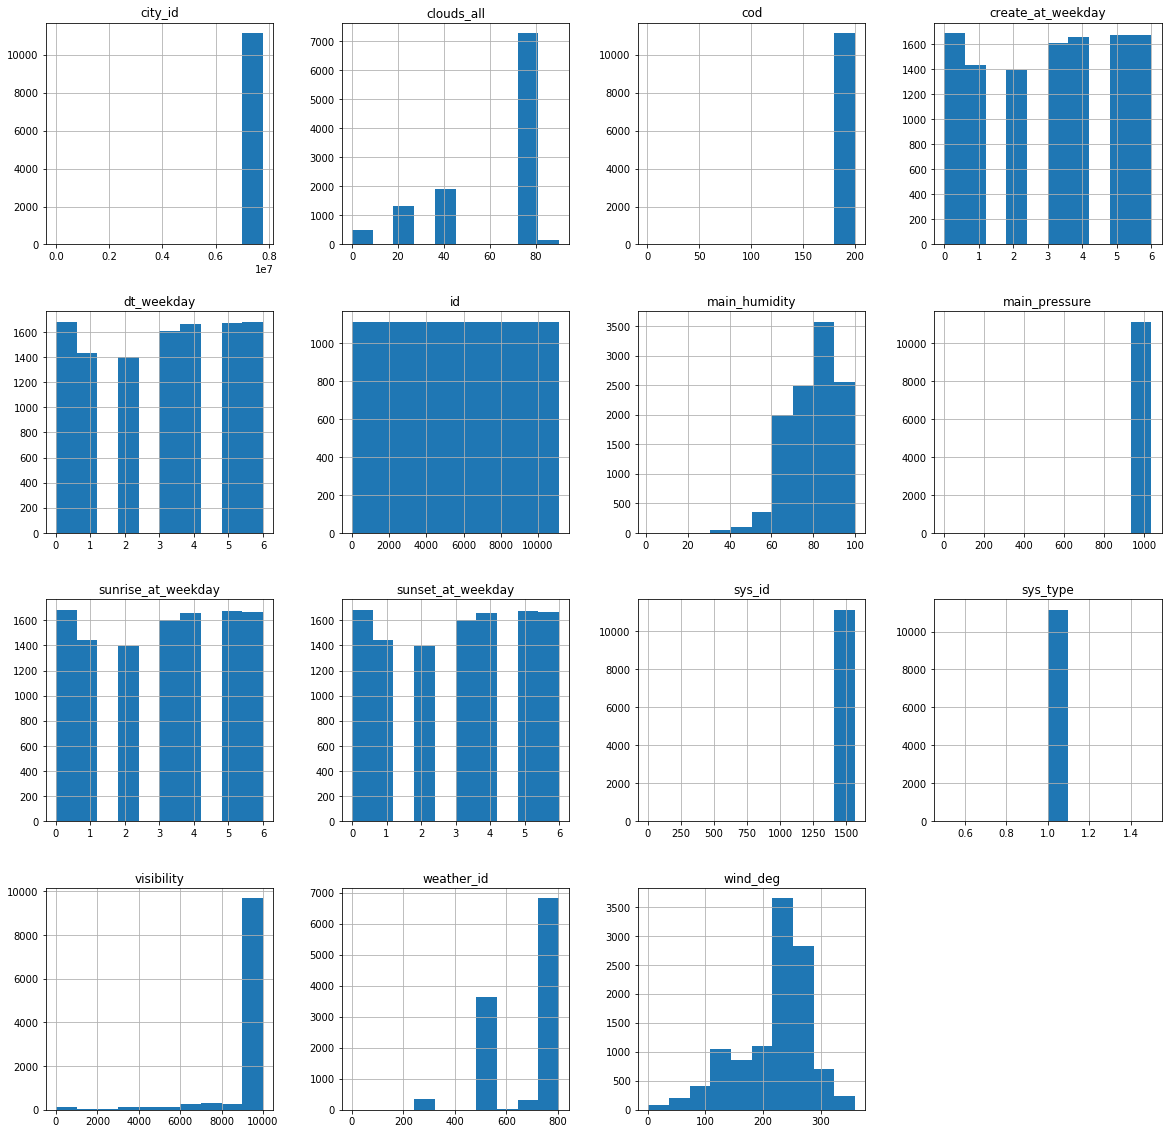

In [73]:
# Histograms for all continuous features within the dataset

plt.figure()
df[numeric_columns].hist(figsize=(20, 20))

### Scatter Plots Comparing All Continuous Features

/Users/mo/anaconda3/envs/comp47350py37/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


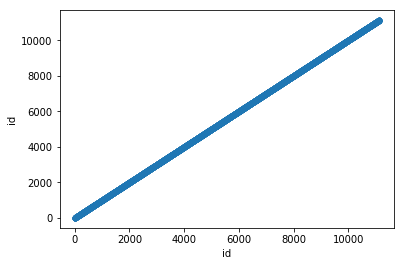

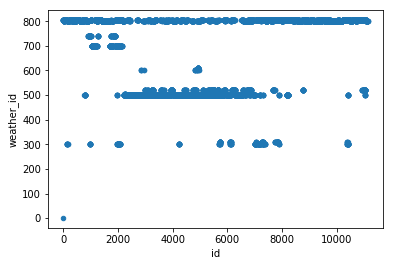

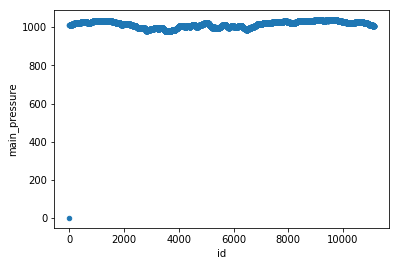

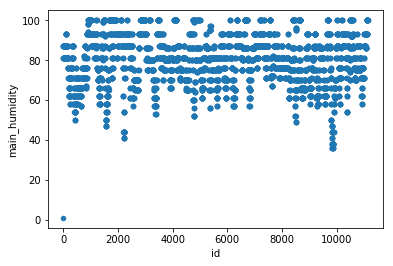

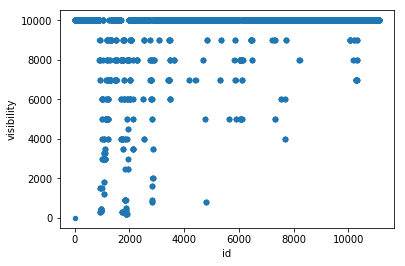

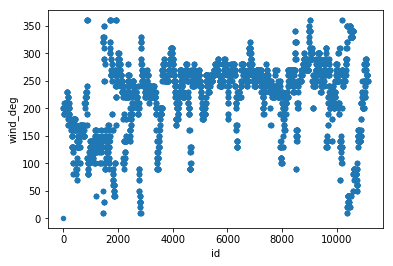

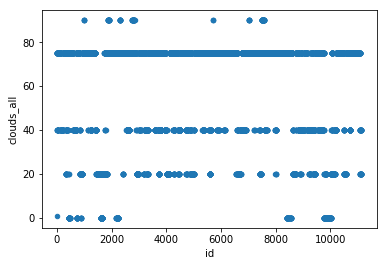

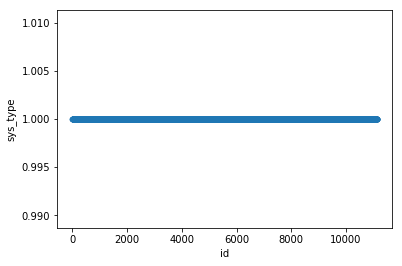

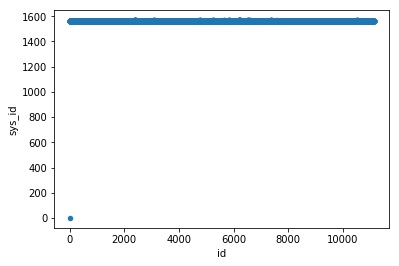

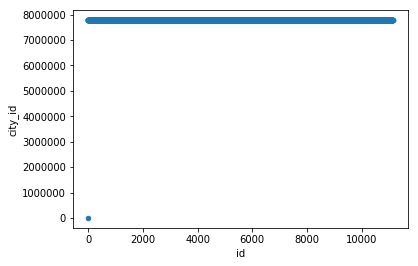

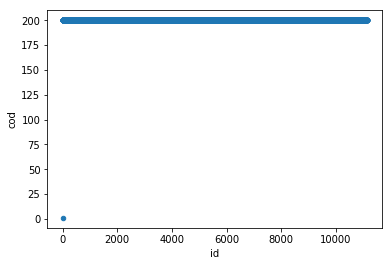

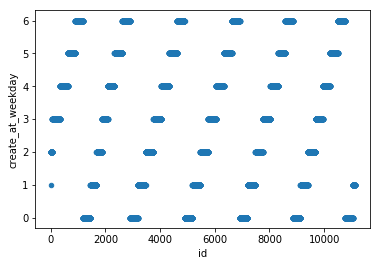

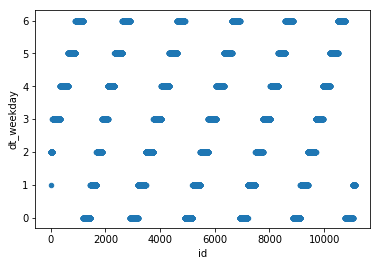

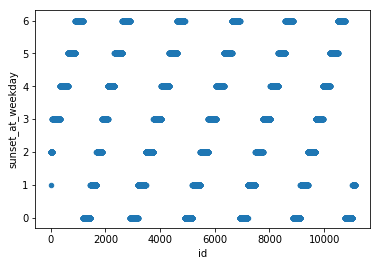

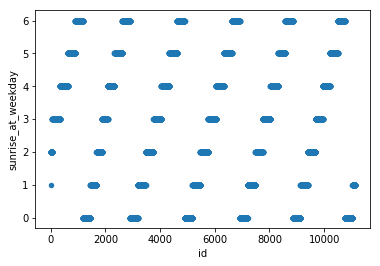

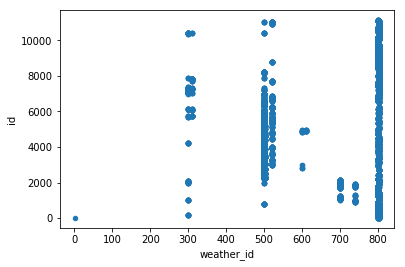

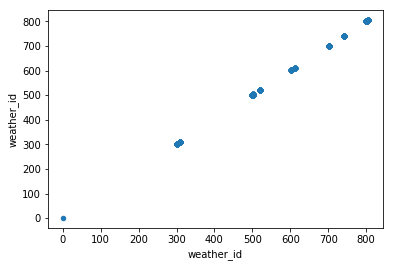

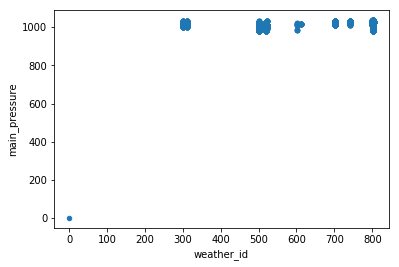

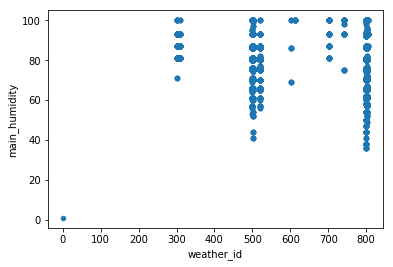

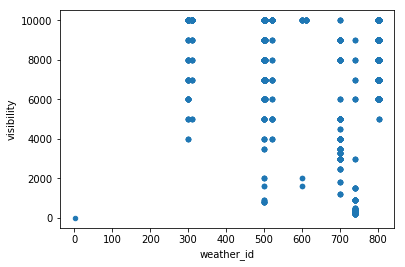

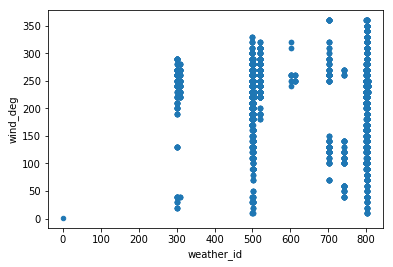

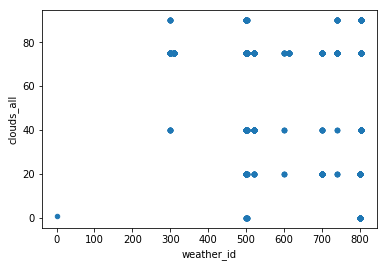

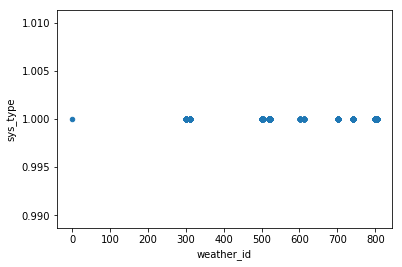

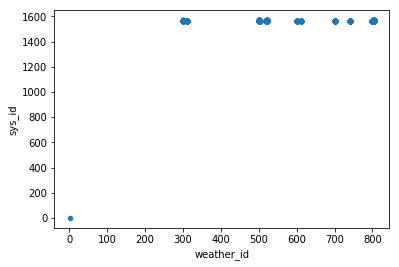

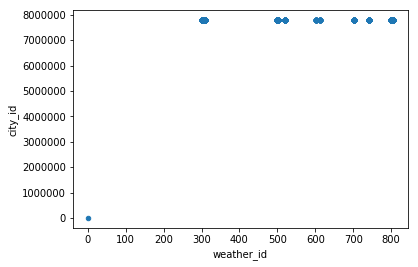

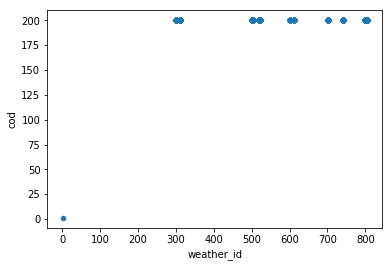

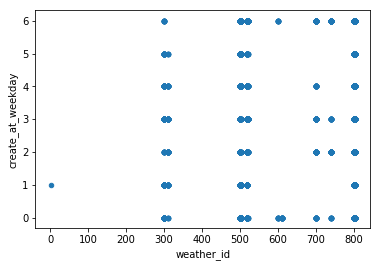

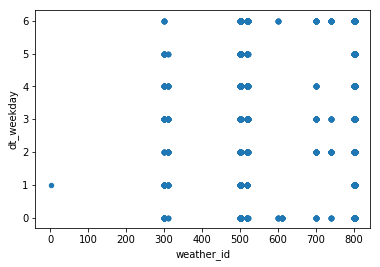

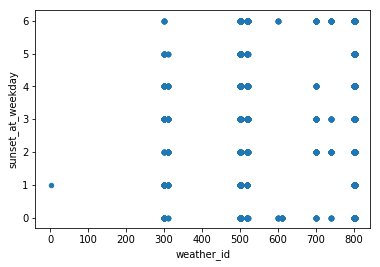

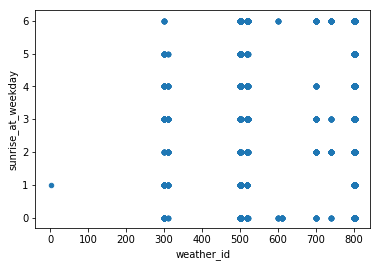

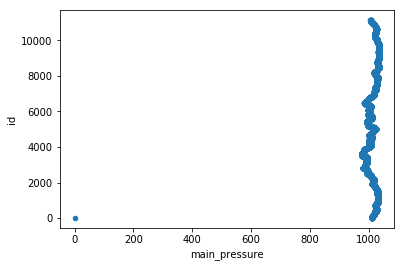

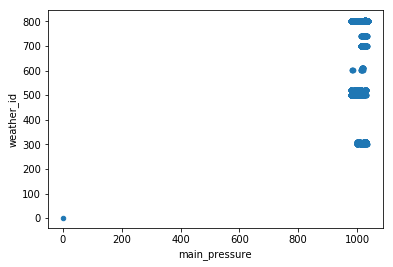

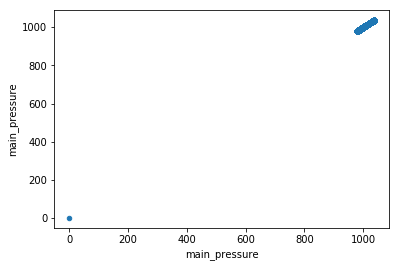

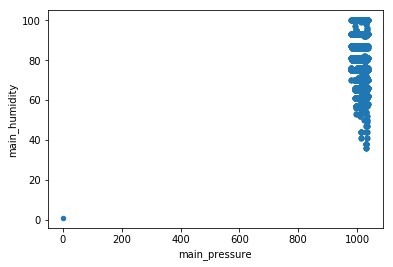

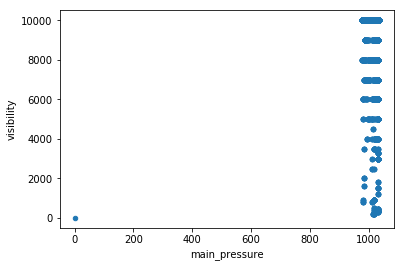

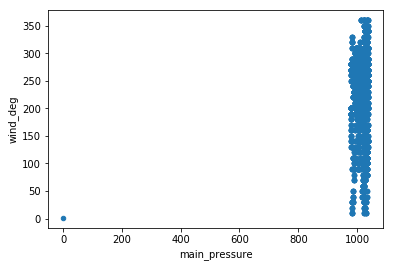

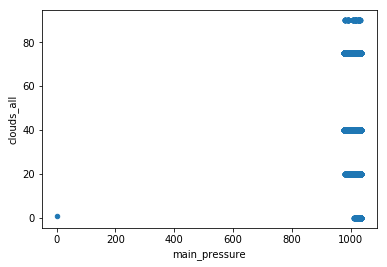

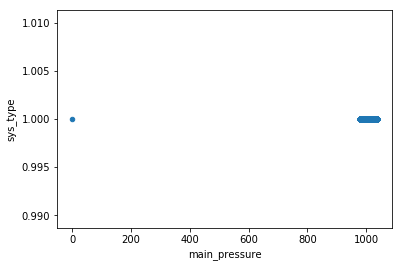

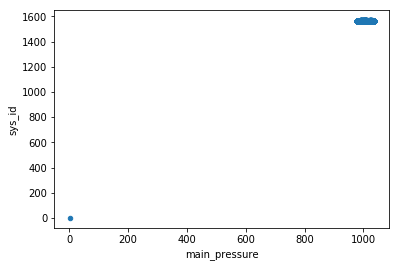

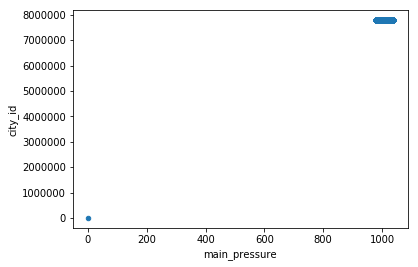

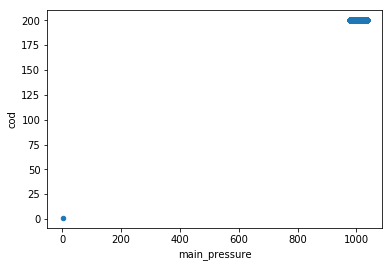

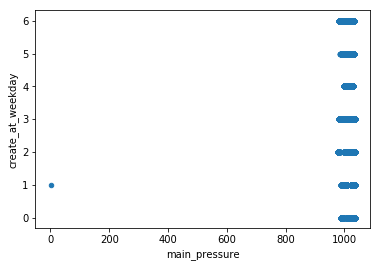

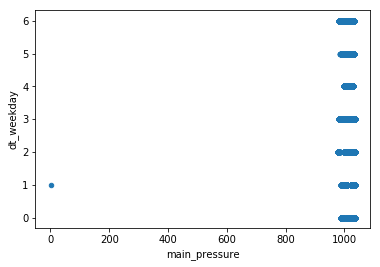

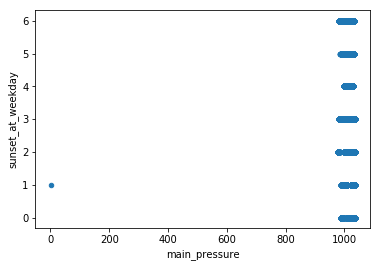

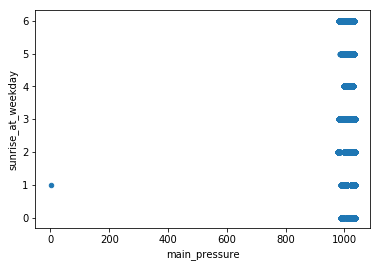

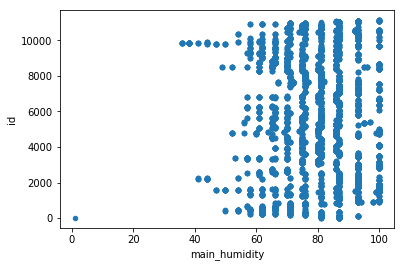

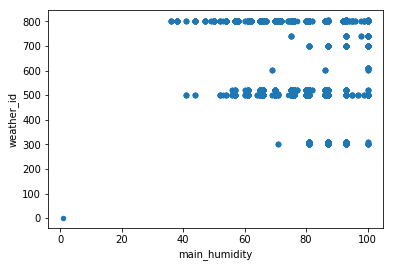

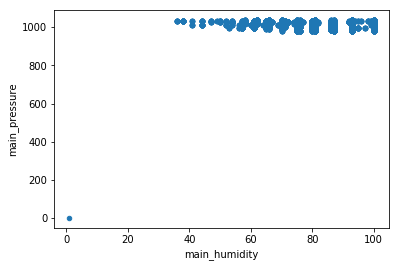

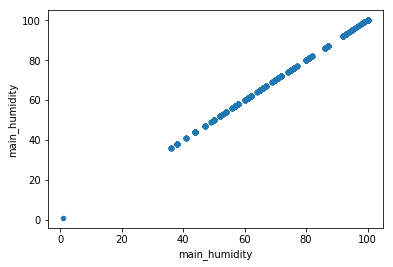

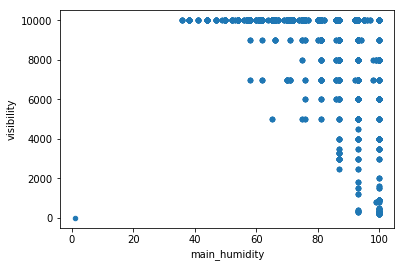

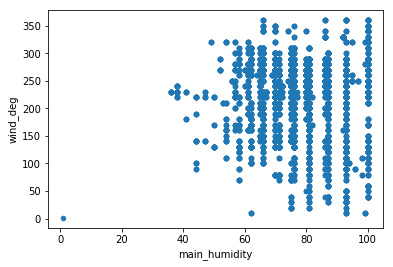

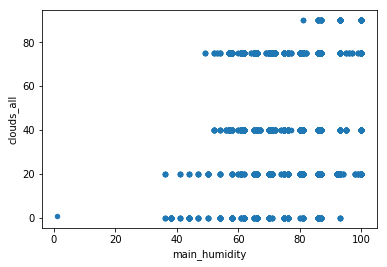

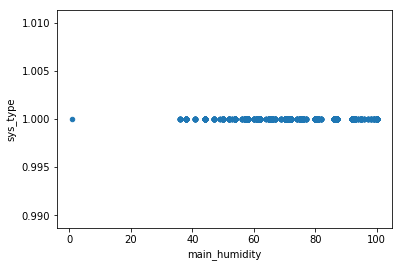

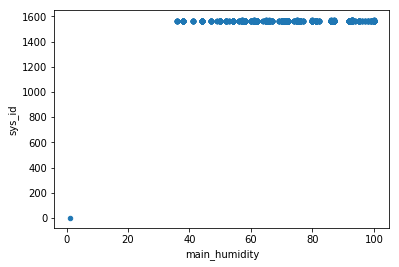

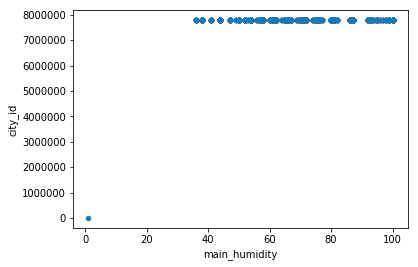

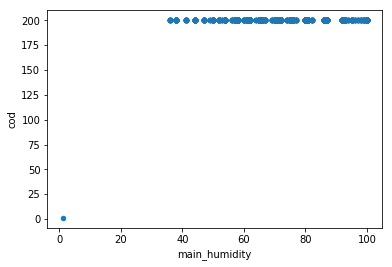

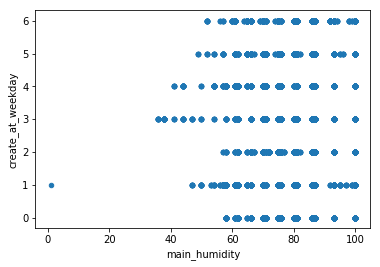

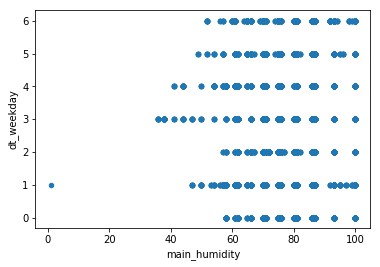

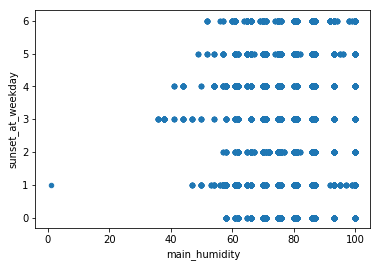

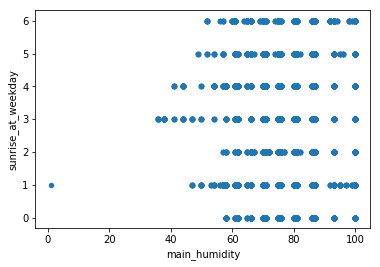

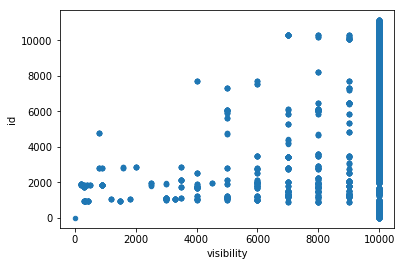

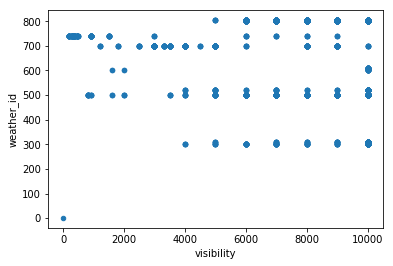

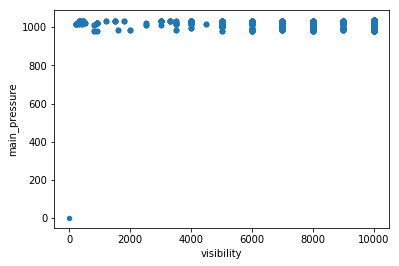

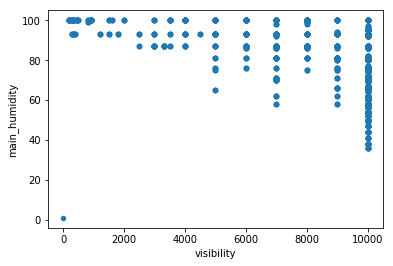

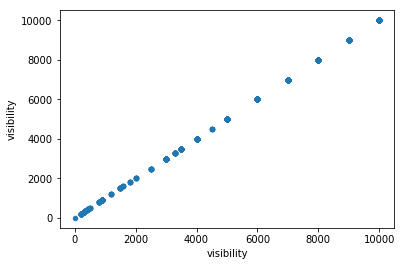

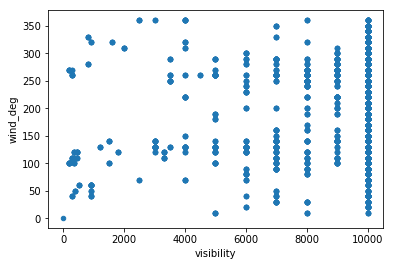

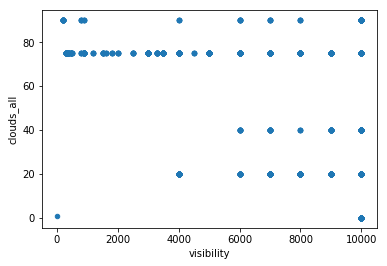

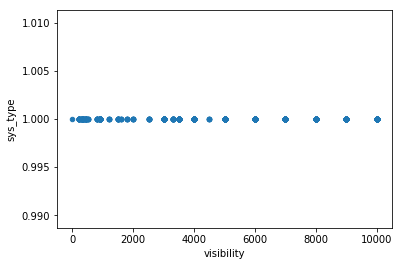

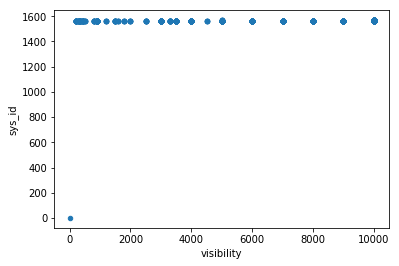

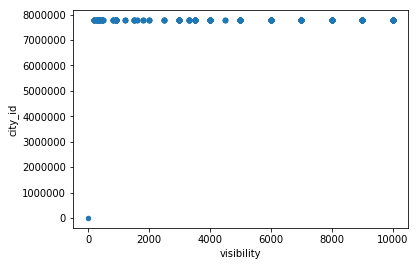

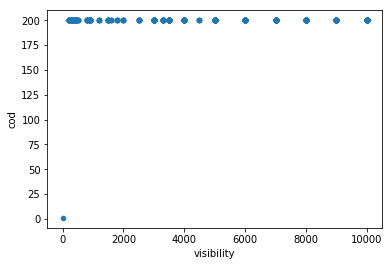

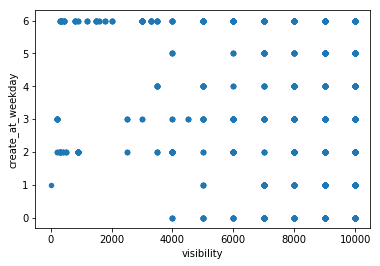

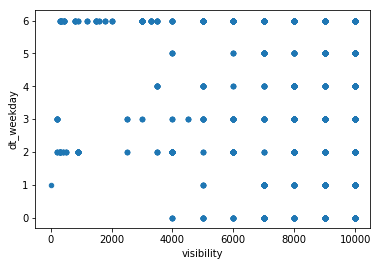

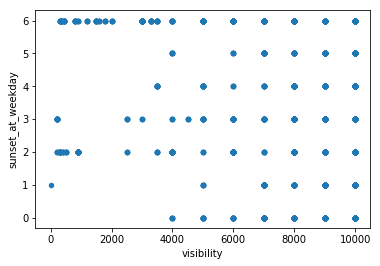

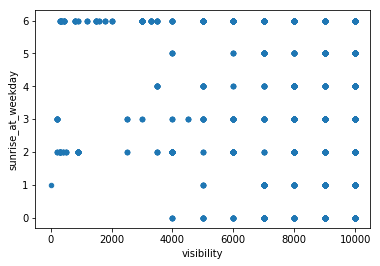

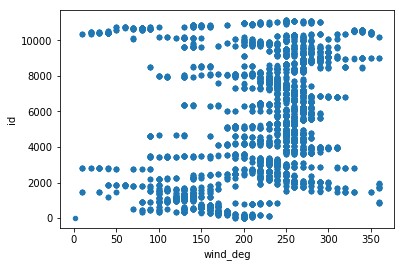

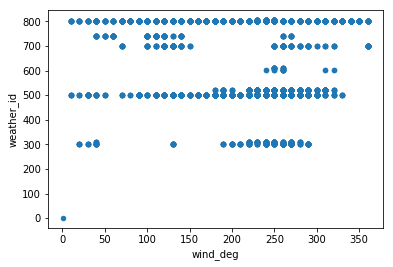

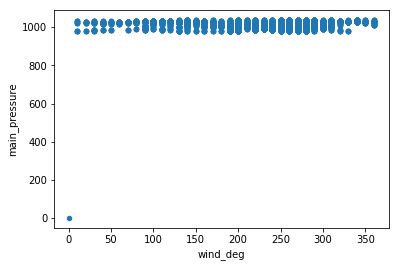

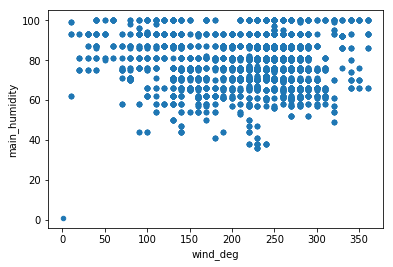

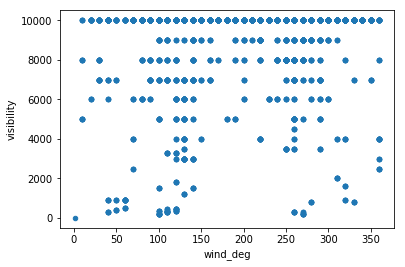

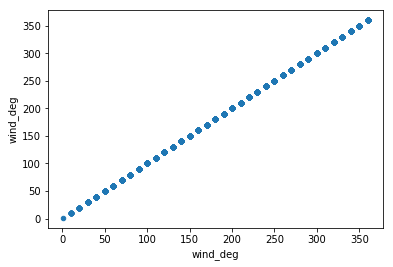

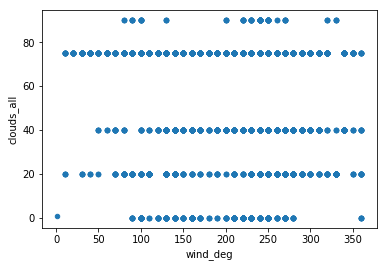

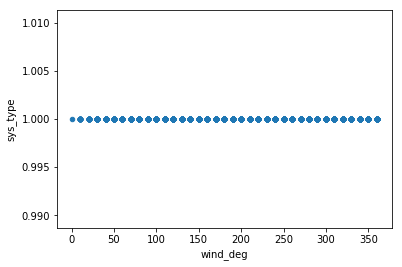

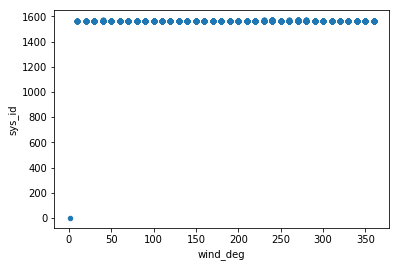

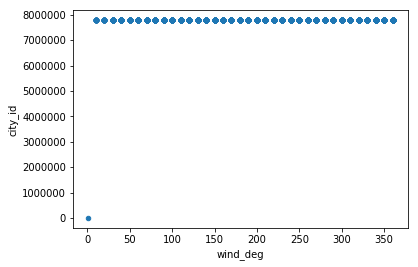

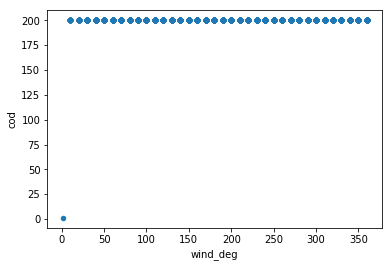

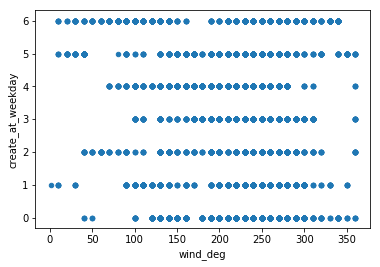

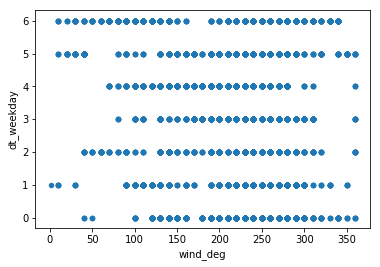

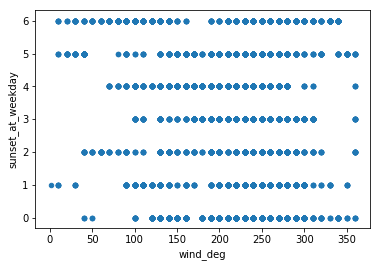

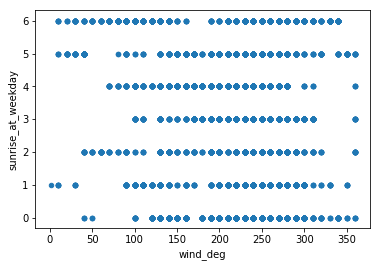

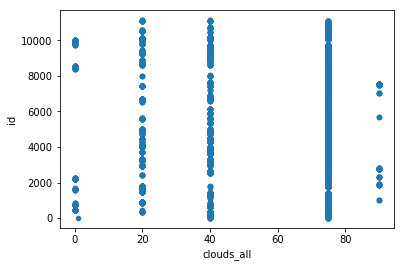

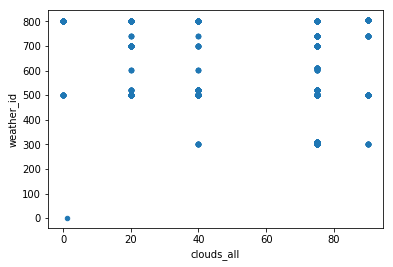

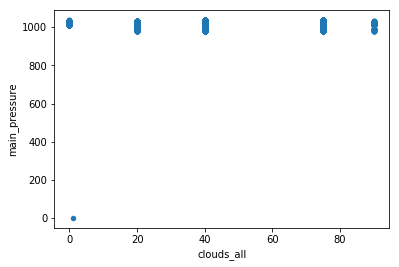

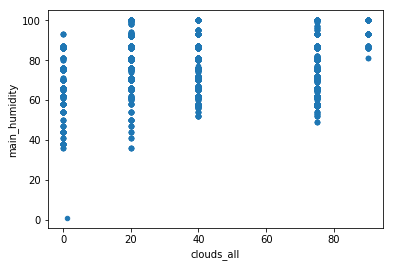

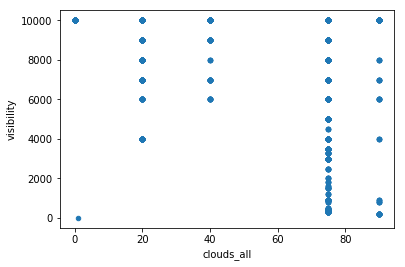

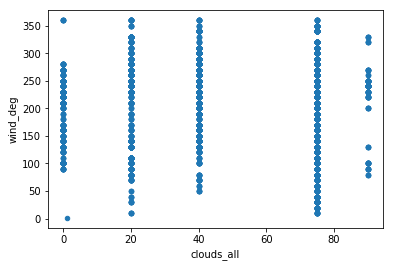

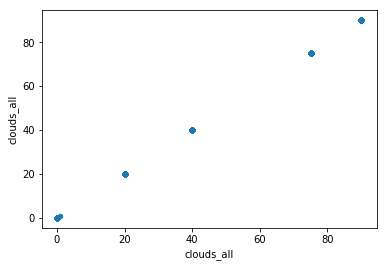

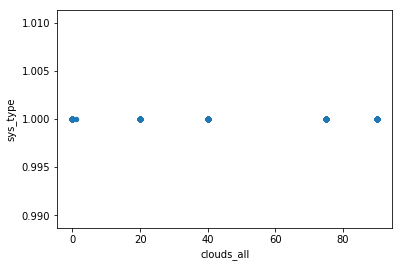

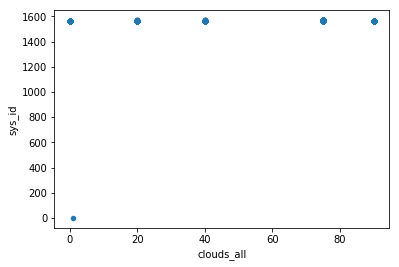

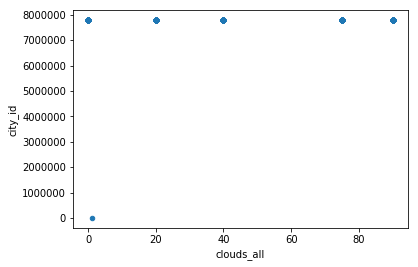

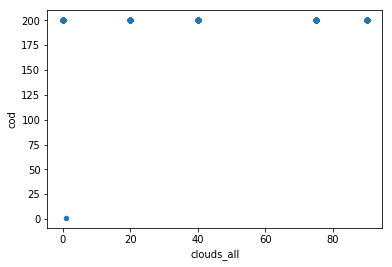

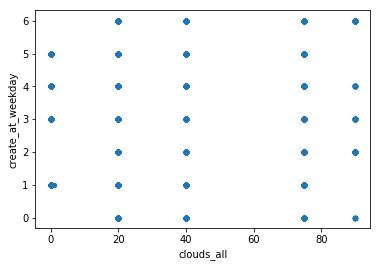

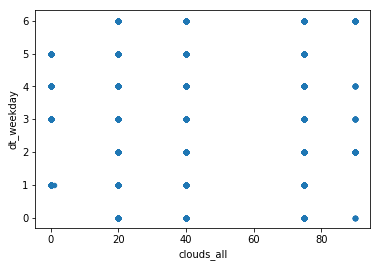

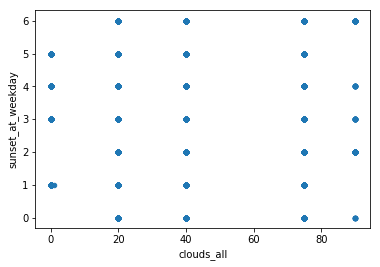

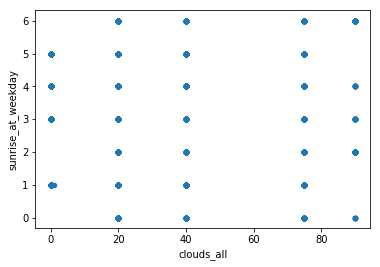

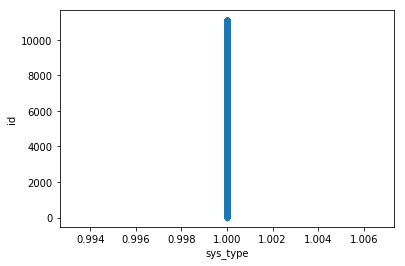

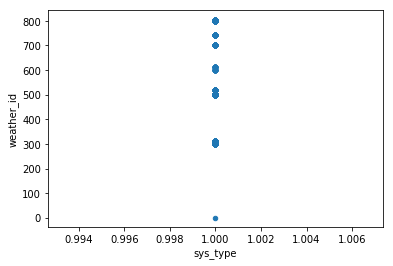

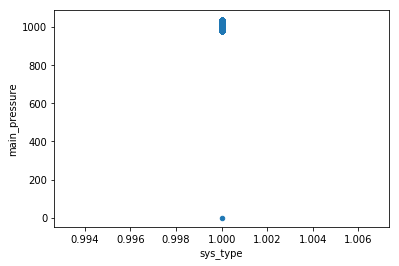

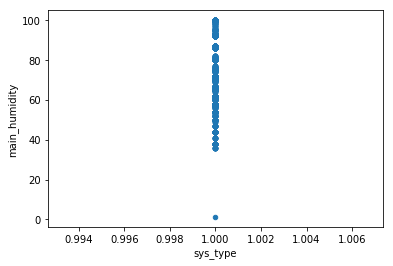

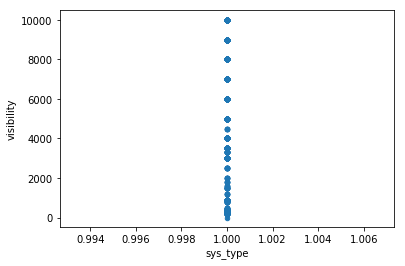

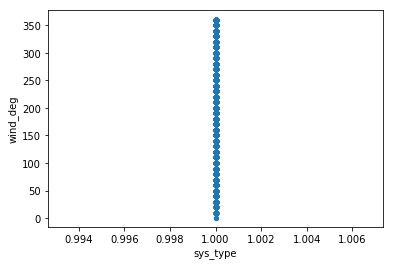

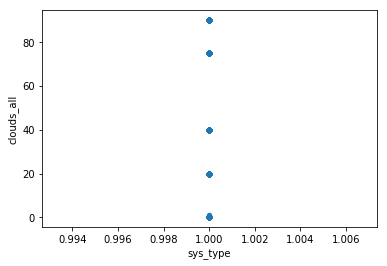

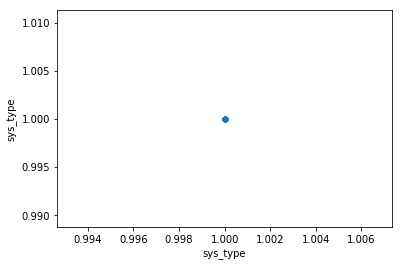

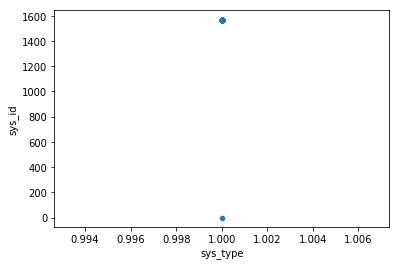

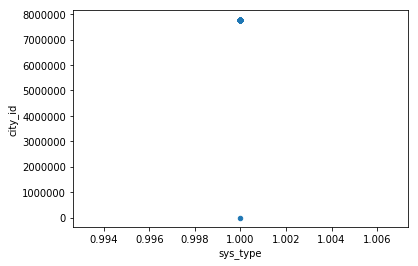

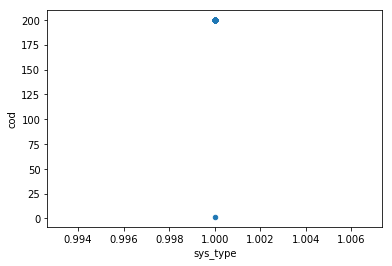

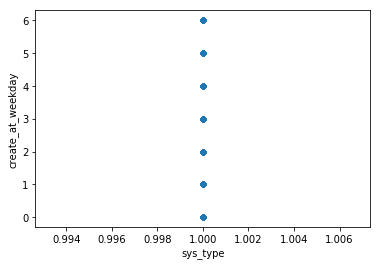

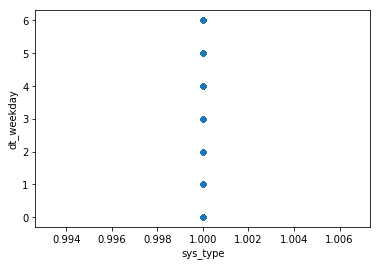

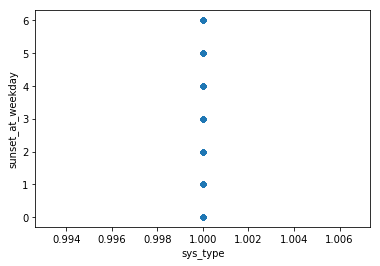

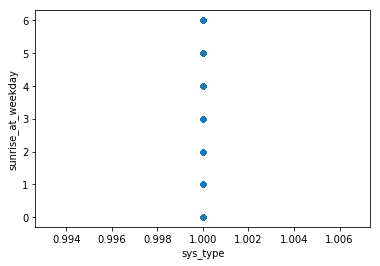

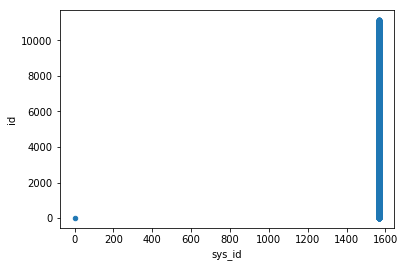

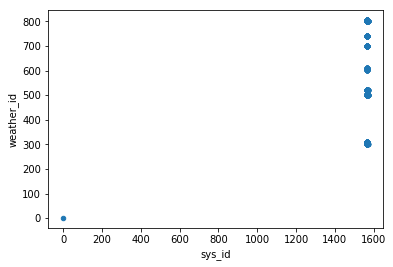

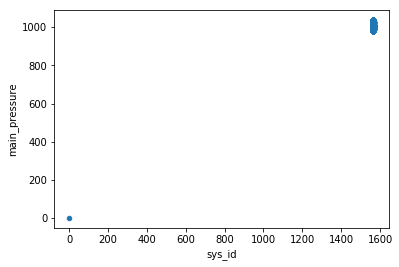

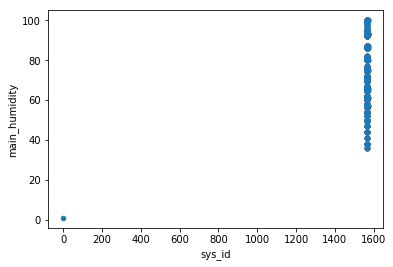

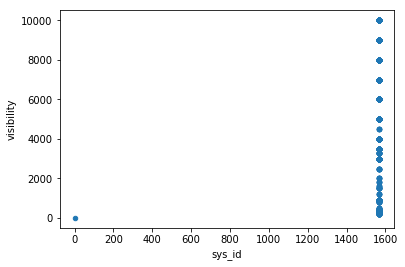

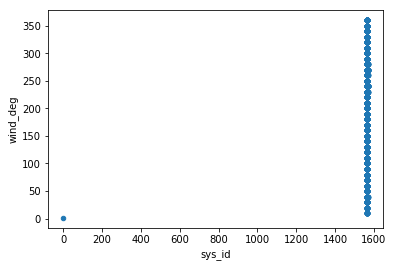

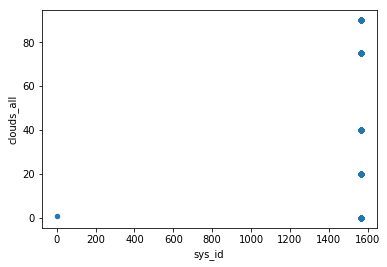

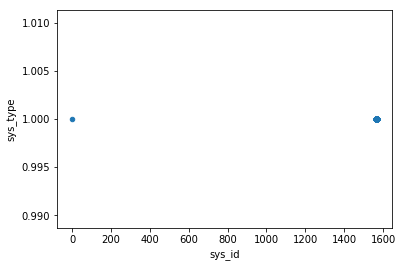

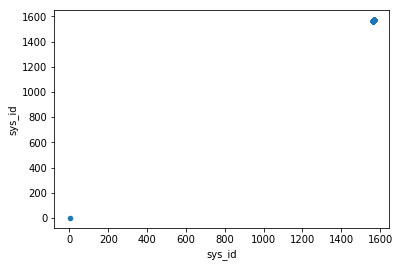

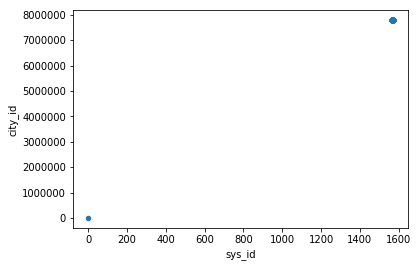

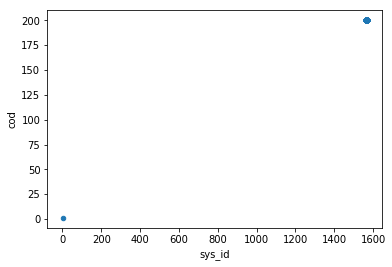

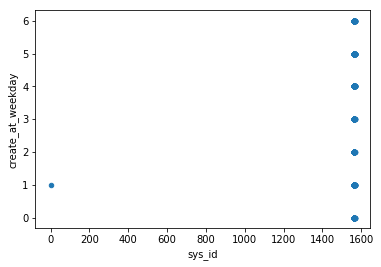

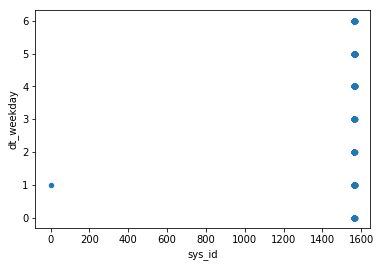

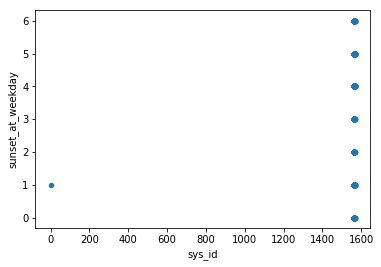

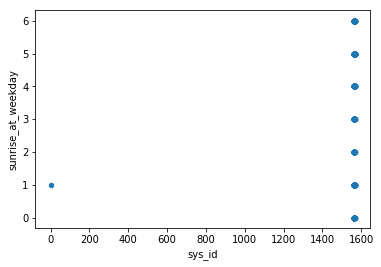

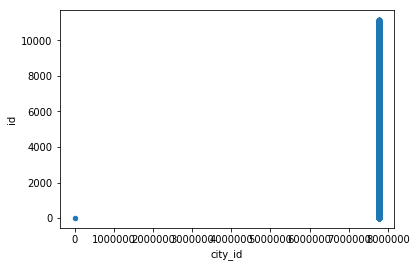

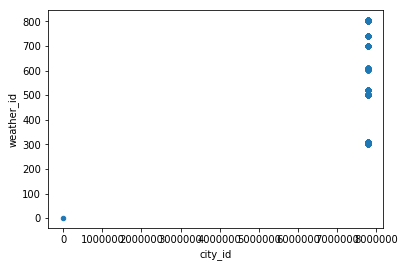

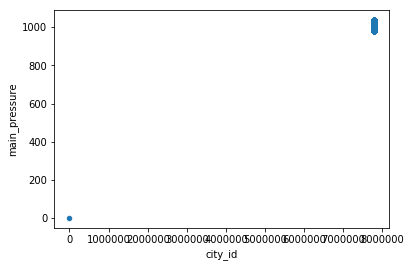

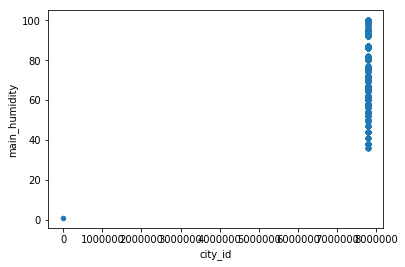

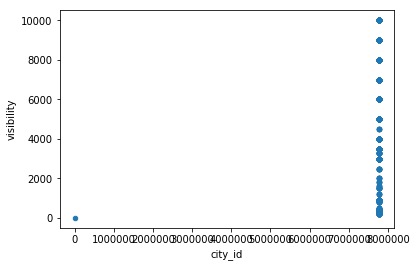

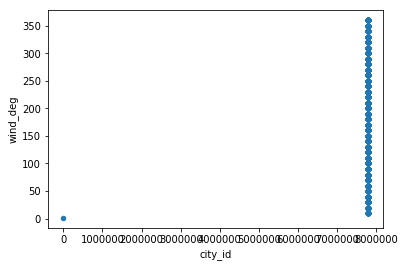

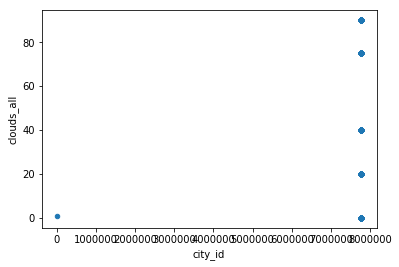

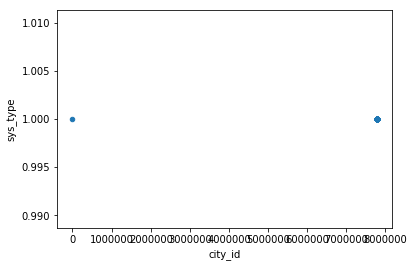

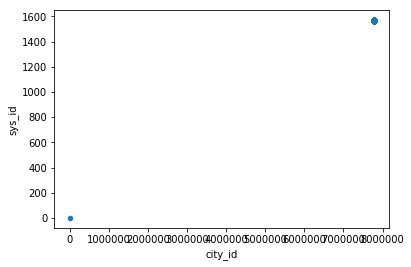

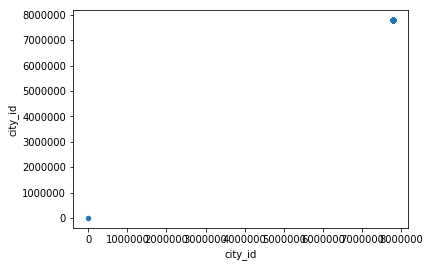

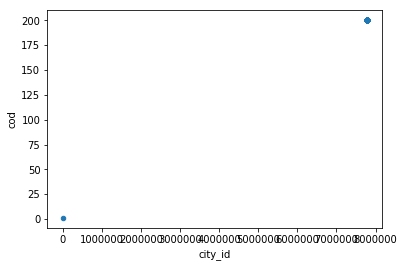

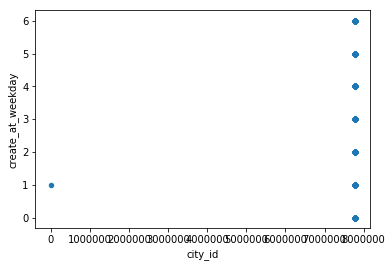

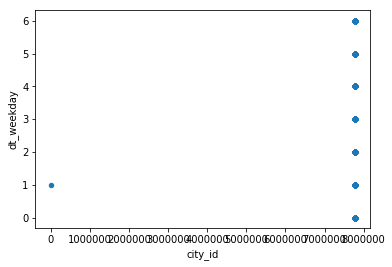

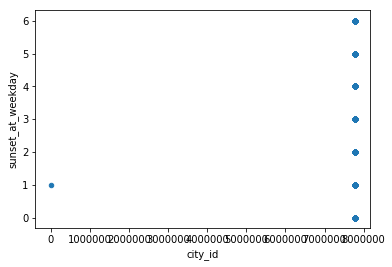

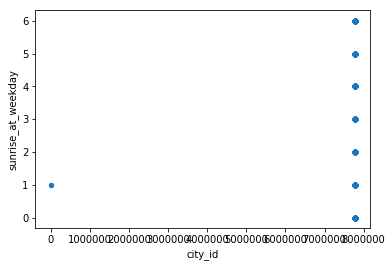

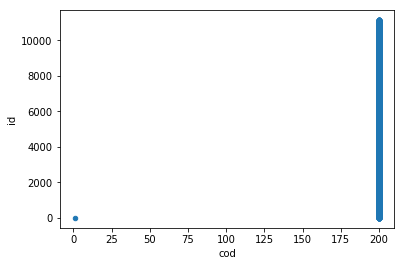

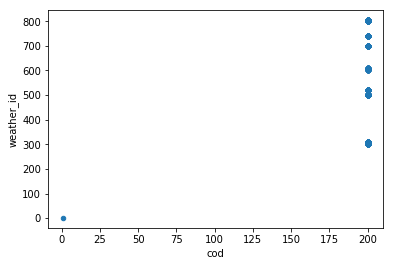

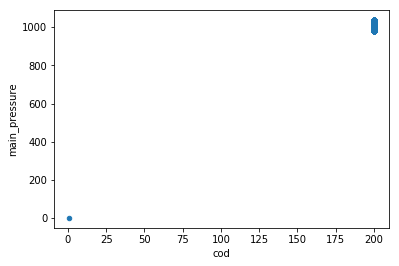

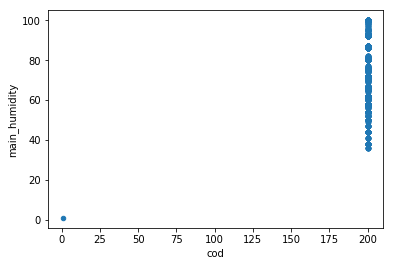

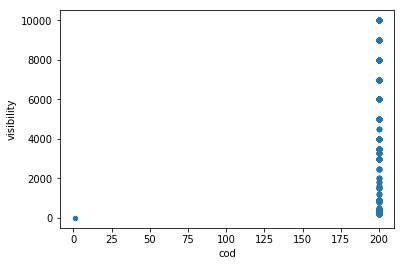

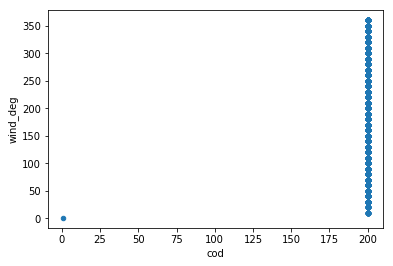

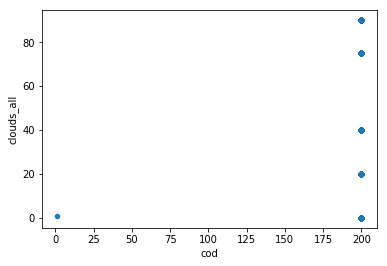

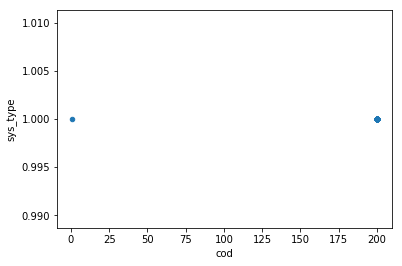

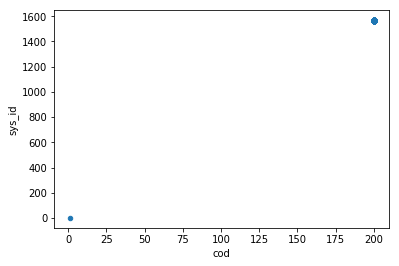

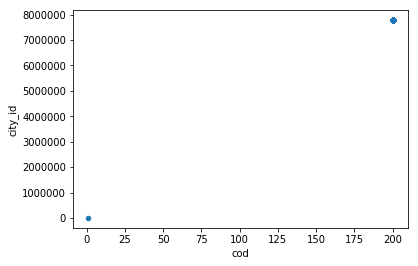

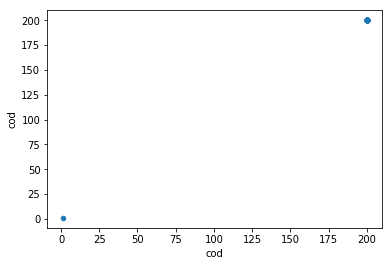

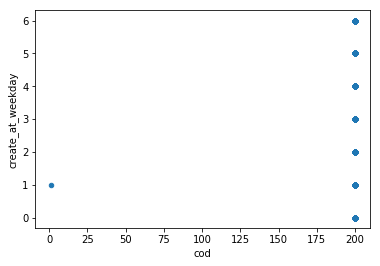

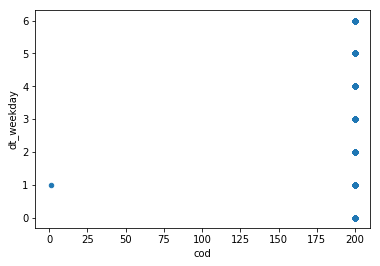

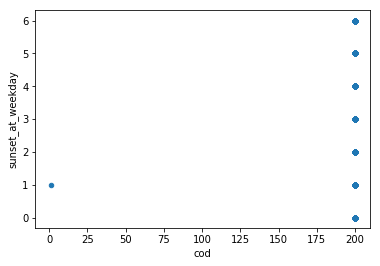

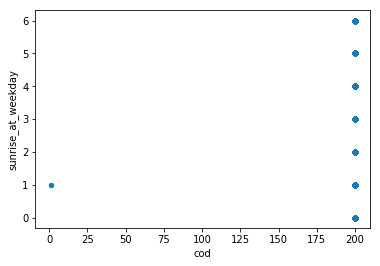

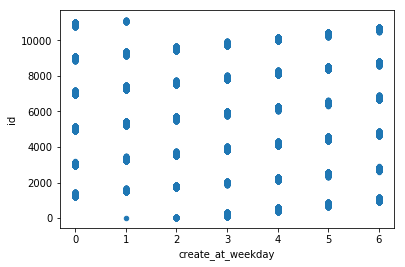

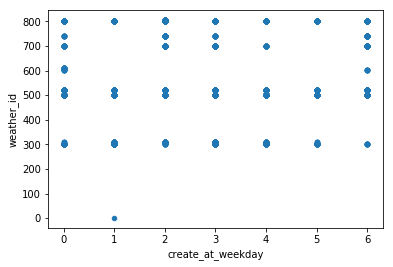

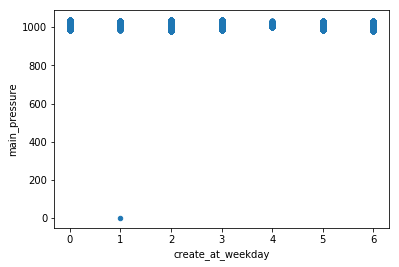

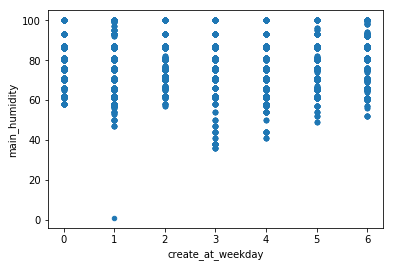

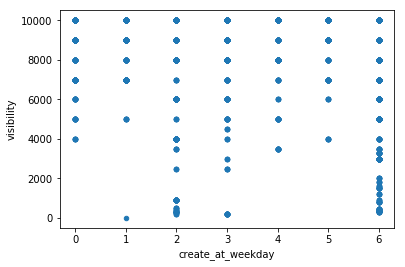

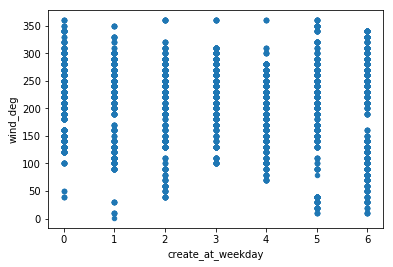

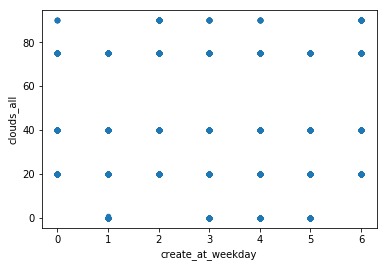

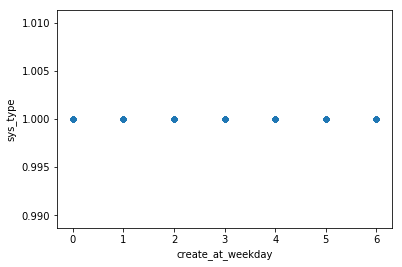

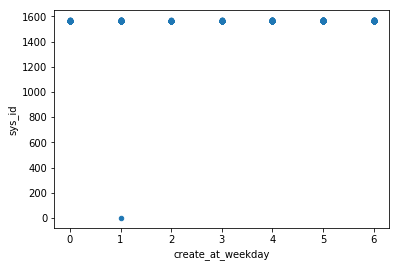

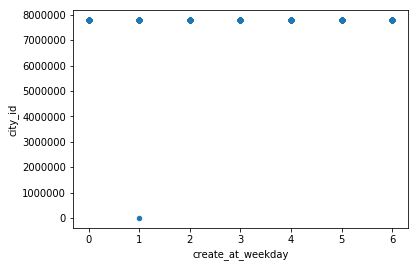

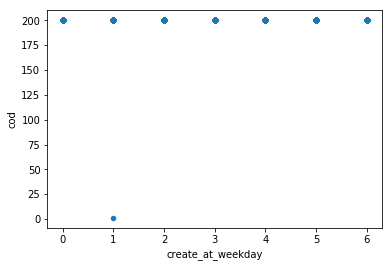

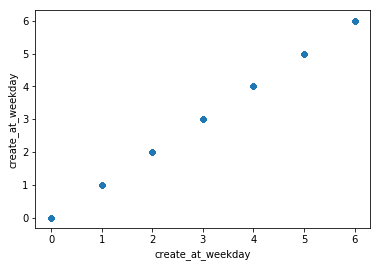

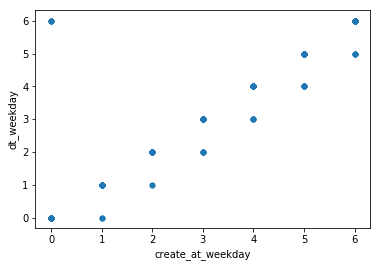

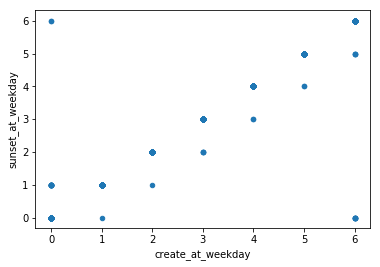

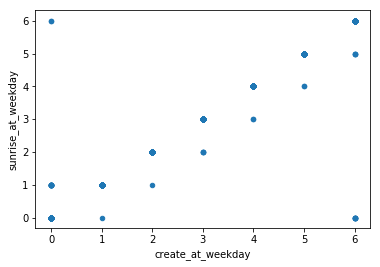

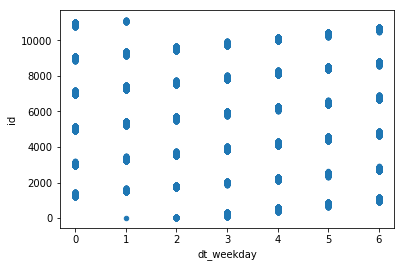

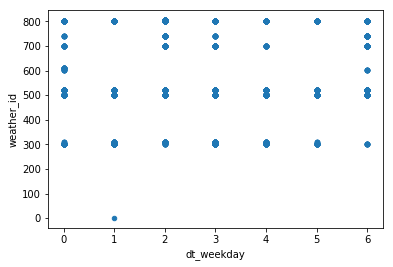

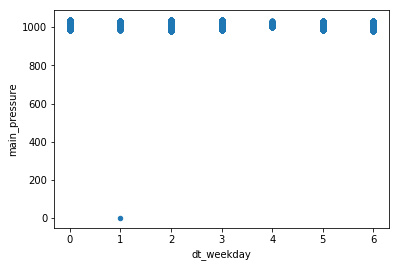

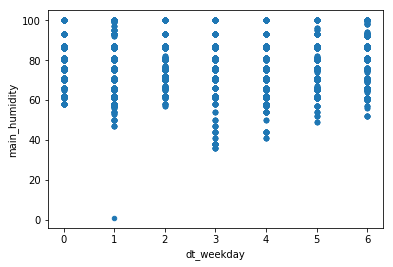

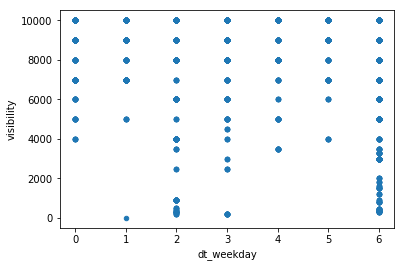

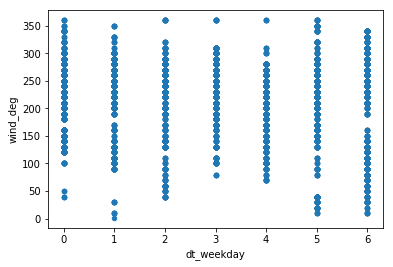

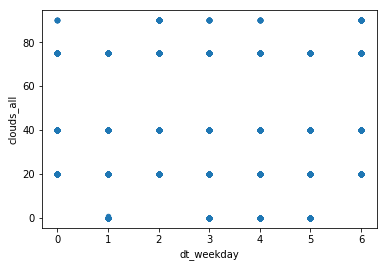

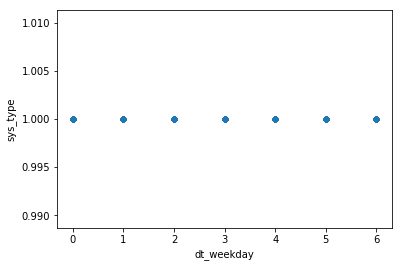

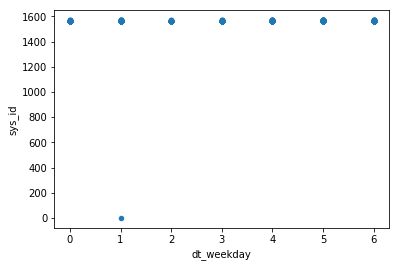

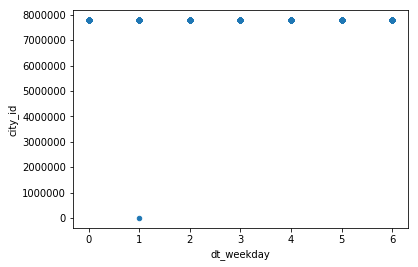

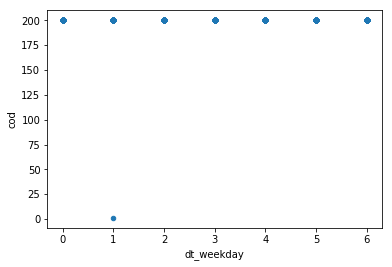

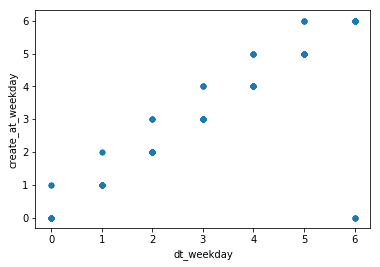

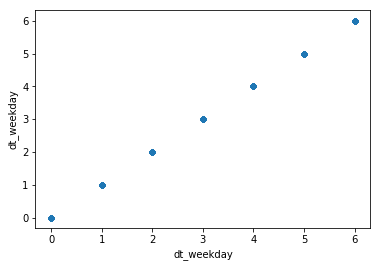

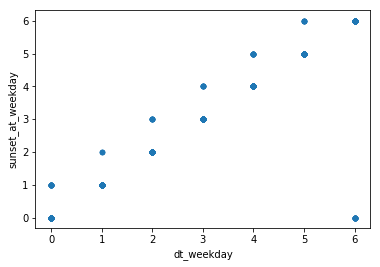

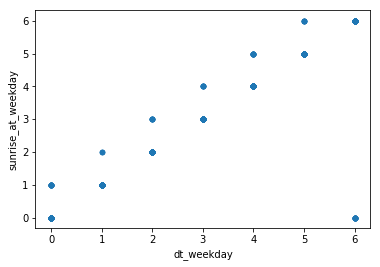

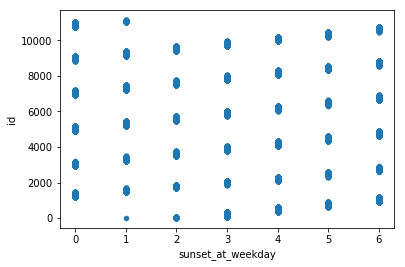

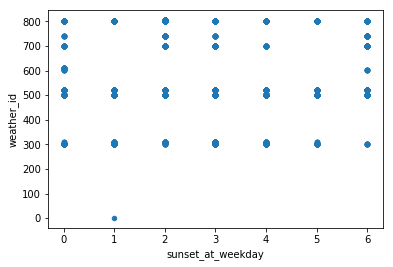

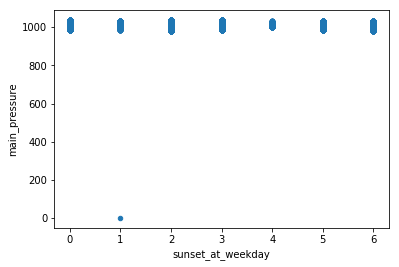

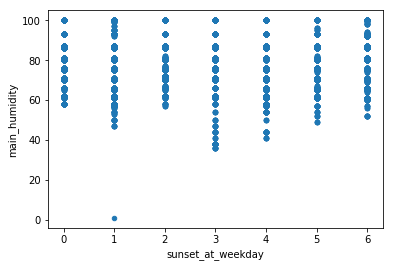

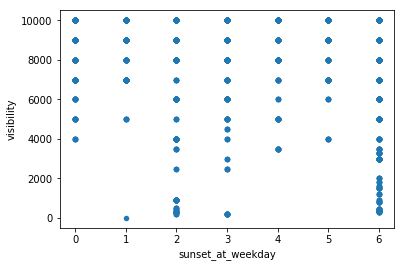

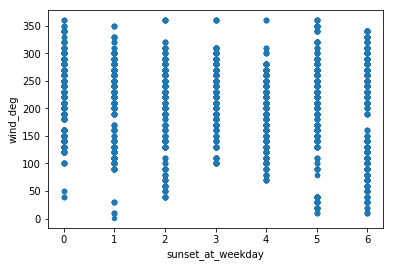

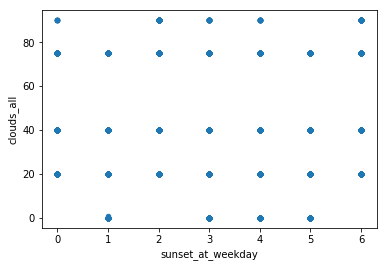

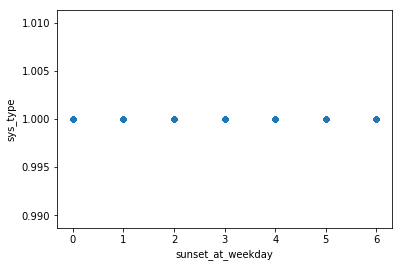

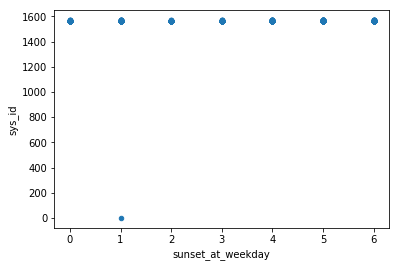

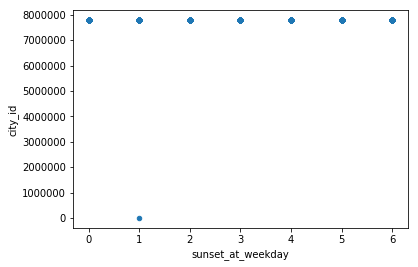

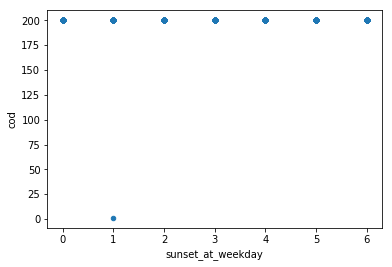

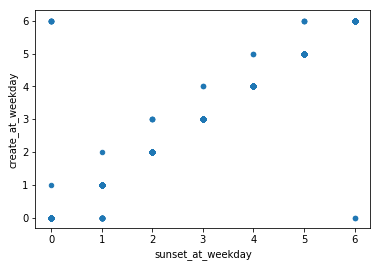

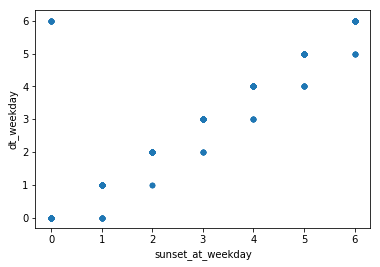

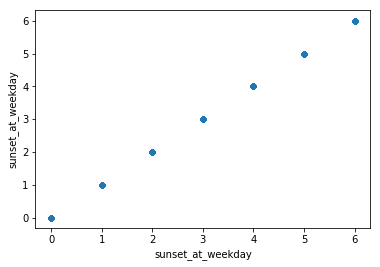

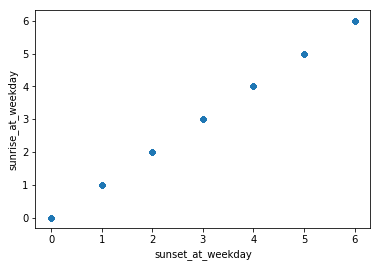

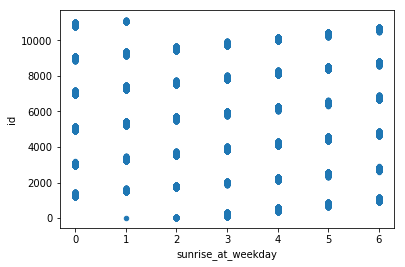

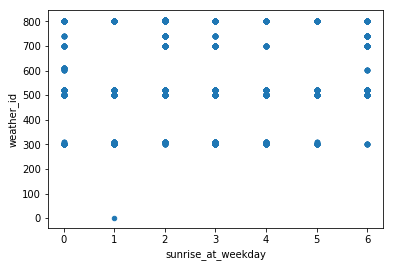

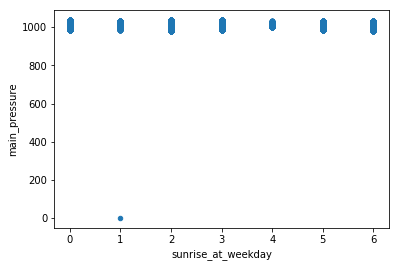

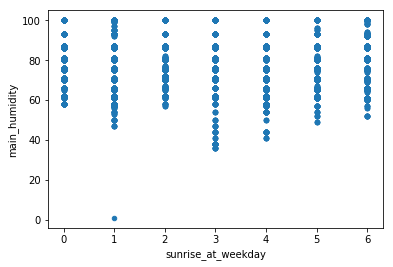

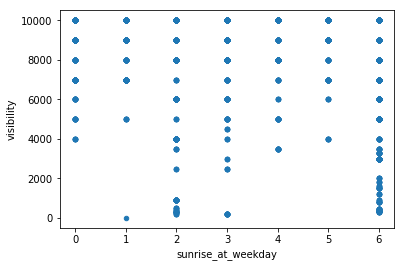

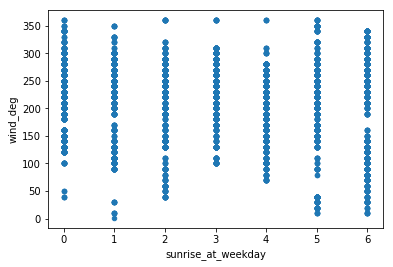

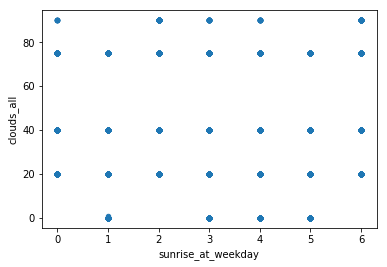

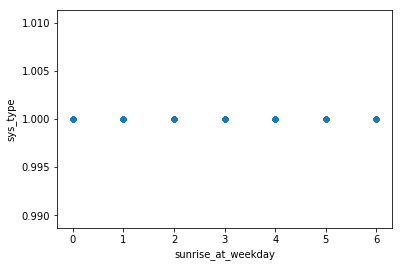

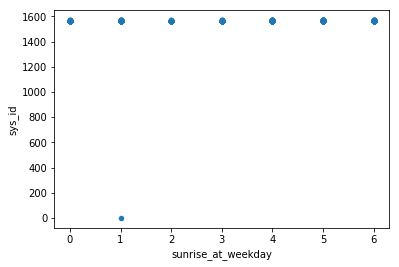

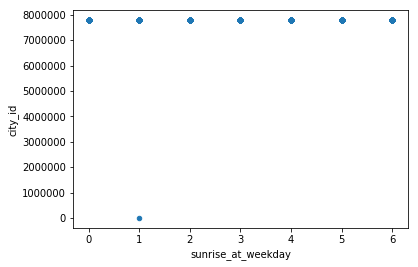

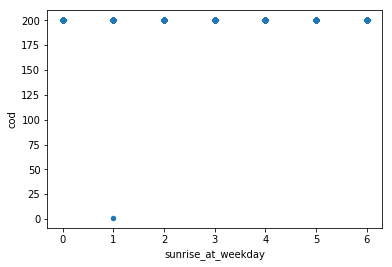

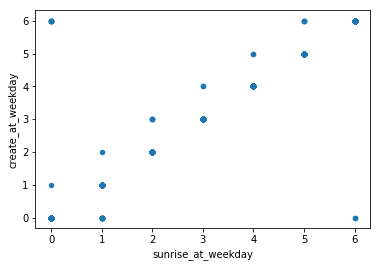

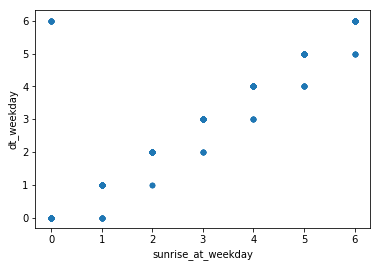

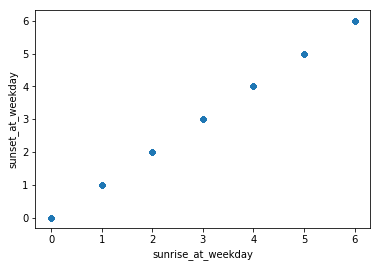

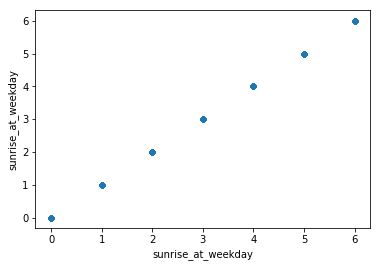

In [74]:
for i in numeric_columns:
     for j in numeric_columns:
         df.plot(kind='scatter', x=i, y=j)

### Barplots for Categorical Features

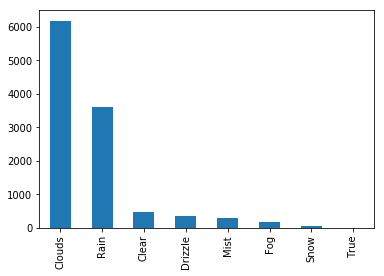

In [75]:
df['weather_main'].value_counts().plot(kind='bar')

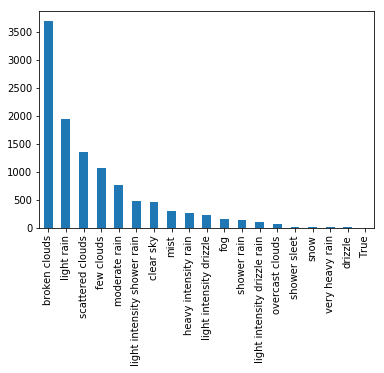

In [76]:
df['weather_description'].value_counts().plot(kind='bar')

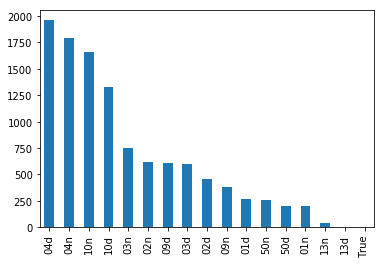

In [77]:
df['weather_icon'].value_counts().plot(kind='bar')

### Linear(?) Plots for DateTime Features

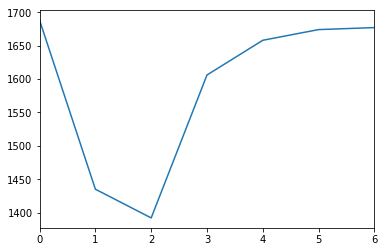

In [78]:
# Cronie run time...?

df.create_at_weekday.value_counts().sort_index().plot()

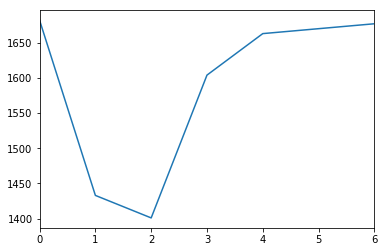

In [79]:
# DateTime 

df.dt_weekday.value_counts().sort_index().plot()

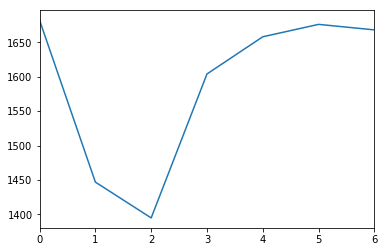

In [80]:
#Sunrise time per day

df.sunrise_at_weekday.value_counts().sort_index().plot()

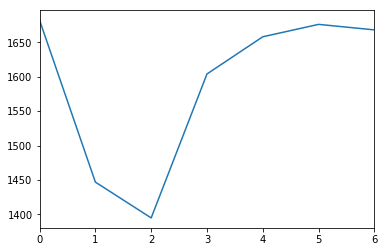

In [81]:
#Sunset time per day

df.sunset_at_weekday.value_counts().sort_index().plot()

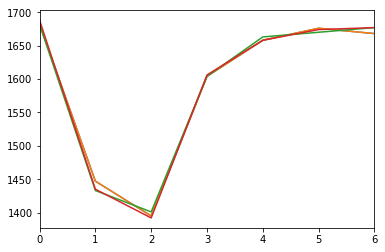

In [82]:
# Comparing weekdays 

df.sunset_at_weekday.value_counts().sort_index().plot()
df.sunrise_at_weekday.value_counts().sort_index().plot()
df.dt_weekday.value_counts().sort_index().plot()
df.create_at_weekday.value_counts().sort_index().plot()

### Save updated_weather csv File

In [ ]:
#Save df to new csv file
#df.to_csv('updated_weather.csv')